In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import matplotlib.font_manager as fm
matplotlib.rc('font', family = 'AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False #필요한 라이브러리 설치

In [6]:
cus_info = pd.read_csv('/Users/yn_kim/Documents/Krista/League2/2_cus_info.csv')

In [7]:
act_info2 = pd.read_csv('/Users/yn_kim/Documents/Krista/League2/2_act_info.csv')

In [8]:
iem_info = pd.read_csv('/Users/yn_kim/Documents/Krista/League2/2_iem_info.csv')

In [9]:
trd_kr_info = pd.read_csv('/Users/yn_kim/Documents/Krista/League2/2_trd_kr.csv')

In [12]:
trd_oss_info = pd.read_csv('/Users/yn_kim/Documents/Krista/League2/2_trd_oss.csv')

## (0) 데이터 준비작업

주어진 데이터들을 복합적으로 분석하기 위해 고객 데이터/계좌 데이터/주식종목 데이터/국내 주식거래 데이터를 통합하여 국내데이터를,
고객 데이터/계좌 데이터/주식종목 데이터/해외 주식거래 데이터를 통합하여 해외데이터를 만들 것이고, 이를 각각 df와 df2로 명명할 것이다. 

In [13]:
df = pd.merge(cus_info, act_info2, on = "cus_id")
df = pd.merge(df, trd_kr_info, on = "act_id")
df = pd.merge(df, iem_info, on = "iem_cd") #국내데이터 병합

df2 = pd.merge(cus_info, act_info2, on = "cus_id")
df2 = pd.merge(df2, trd_oss_info, on = "act_id")
df2 = pd.merge(df2, iem_info, on = "iem_cd") #해외데이터 병합

In [14]:
df

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,iem_krl_nm
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-,fe689fbddf2bb32c1489d66f0ba0ef5da9478b82e7f56c...,200110,20190128,1,11,11,A007390,2,910.0,15000.0,1,"NATURECELL CO.,LTD. ...",네이처셀 ...
1,ba7e0d017b3074ca5542e4b6effc1b0cbe3e564238811f...,1,70,26,03,-,1ecdabdee29403d69262bd4d0dcb14364c15f54afcc27f...,199808,20190124,6,15,15,A007390,1,1000.0,12350.0,3,"NATURECELL CO.,LTD. ...",네이처셀 ...
2,ba7e0d017b3074ca5542e4b6effc1b0cbe3e564238811f...,1,70,26,03,-,1ecdabdee29403d69262bd4d0dcb14364c15f54afcc27f...,199808,20190201,1,10,10,A007390,2,1000.0,15100.0,4,"NATURECELL CO.,LTD. ...",네이처셀 ...
3,ba7e0d017b3074ca5542e4b6effc1b0cbe3e564238811f...,1,70,26,03,-,1ecdabdee29403d69262bd4d0dcb14364c15f54afcc27f...,199808,20190131,1,9,9,A007390,1,1500.0,13800.0,4,"NATURECELL CO.,LTD. ...",네이처셀 ...
4,ba7e0d017b3074ca5542e4b6effc1b0cbe3e564238811f...,1,70,26,03,-,1ecdabdee29403d69262bd4d0dcb14364c15f54afcc27f...,199808,20190117,3,9,9,A007390,2,600.0,12050.0,4,"NATURECELL CO.,LTD. ...",네이처셀 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312659,d7aa92ff4f32ea3934fb08450b0e7df6f567dcb5e47f02...,2,25,43,_,03,eec3d77422b5420811a6bf67919a362f04a4aec0deb9a7...,202006,20200615,9,9,9,Q550044,2,5.0,12720.0,3,NH QV 2X S&P500 ETN 44 ...,NH투자증권 QV 레버리지 S&P500 상장지수증권 제44호 ...
3312660,0931f895fe62bcdf3918b0ad6271c76d4f1934ff0e36eb...,1,45,41,09,04,18fb39d6b1a9cc66851aaad1c22d1fcb7a3e92cf57a61c...,201506,20200610,1,10,10,J57F153,2,5000.0,180.0,3,KOREA INVESTMENT & SECURITIES ELW F153 ...,한국투자증권(주) 주식워런트증권 제F153호 ...
3312661,0931f895fe62bcdf3918b0ad6271c76d4f1934ff0e36eb...,1,45,41,09,04,18fb39d6b1a9cc66851aaad1c22d1fcb7a3e92cf57a61c...,201506,20200610,2,14,14,J57F153,1,5000.0,150.0,3,KOREA INVESTMENT & SECURITIES ELW F153 ...,한국투자증권(주) 주식워런트증권 제F153호 ...
3312662,8489d04350ed2aff0a4d4ae2aa4ddcb90225f7a6caaa62...,2,55,46,05,02,80b45c79fd320df00113aad22820bc522bc15e1b1a039e...,201908,20200630,42,10,10,Q530004,2,1.0,4395.0,3,Samsung Securities Samsung Cosmetics Theme ETN...,삼성증권 삼성 화장품 테마주 파생결합증권(상장지수증권) 제4호 ...


In [15]:
df2

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,orr_ord,...,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt,iem_eng_nm,iem_krl_nm
0,2582f8ba6a49867ee265a2382d9a07cd4bee71d9e95c7a...,1,70,11,03,03,fc09e95cd23235accca3dad2a8b95c25044b6790195d3a...,200710,20200129,1,...,23,US01609W1027,1,44.0,212.5000,1,USD,1176.7,Alibaba ...,알리바바 그룹 홀딩 ...
1,5b4bd1d5fa738513eb1697b4687b0cc29e1eb275e2cbbf...,1,65,41,03,05,2aa84ccccff5c8a34a536c38509ec65176a111b7a35f41...,201501,20191219,1,...,8,US01609W1027,1,100.0,210.1300,1,USD,1165.3,Alibaba ...,알리바바 그룹 홀딩 ...
2,5b4bd1d5fa738513eb1697b4687b0cc29e1eb275e2cbbf...,1,65,41,03,05,2aa84ccccff5c8a34a536c38509ec65176a111b7a35f41...,201501,20191219,2,...,9,US01609W1027,2,100.0,210.1300,1,USD,1164.5,Alibaba ...,알리바바 그룹 홀딩 ...
3,8fbdbe578d91cf5da779308f5532e670a019faf62b7d24...,1,25,41,05,05,3b8c249d312c555dd2f3966da0e63225ce960a4769c597...,201503,20190408,1,...,23,US01609W1027,1,3.0,187.3901,3,USD,1136.4,Alibaba ...,알리바바 그룹 홀딩 ...
4,adead16192778d73a2636ea10cfa503008ef37803dee61...,1,50,43,04,03,2a2abac8684399b5742c2c972e31005a1445adbf398c4c...,202003,20200521,4,...,22,US01609W1027,1,5.0,211.6400,3,USD,1227.8,Alibaba ...,알리바바 그룹 홀딩 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,8adaafbaf8b67770721d88de60e5b5c2e2d9a172c8a639...,1,45,41,05,05,03e018d1147ee3cedf63c8d2bfa5b0a53fedd0dfd6aa4a...,201710,20200210,3,...,0,US0794814048,1,36.0,10.3600,3,USD,1187.2,Bellicum Pharms ...,Bellicum Pharms ...
29297,d7ec1ffebdbfa829cf7f4f982bcb90b29d112d34ea85aa...,1,40,47,05,05,4a9158353671d5e8954b93bc777684b86b8f9be777adfa...,202004,20200529,2,...,2,US00090Q1031,2,30.0,7.0199,3,USD,1239.4,ADT ...,ADT Inc. ...
29298,d7ec1ffebdbfa829cf7f4f982bcb90b29d112d34ea85aa...,1,40,47,05,05,4a9158353671d5e8954b93bc777684b86b8f9be777adfa...,202004,20200602,1,...,23,US00090Q1031,1,30.0,8.0601,3,USD,1227.8,ADT ...,ADT Inc. ...
29299,d7ec1ffebdbfa829cf7f4f982bcb90b29d112d34ea85aa...,1,40,47,05,05,21c41a8c0052636fc3e298d83b85ca8c3ba345f00adb1d...,201306,20200605,1,...,0,US98980A1051,1,1.0,33.6201,3,USD,1217.4,ZTO Express ...,중퉁콰이디 ...


국내데이터는 총 3312664건이, 해외데이터는 총 29301건이 있음을 알 수 있어 거래량의 차이가 확연히 드러남을 알 수 있다. 다음으로, 위의 데이터세트에 고객의 연령대를 파악할 수 있는 칼럼 cus_age_detail을 추가하여 추가 분석에 사용할 것이다.

In [16]:
df.loc[df['cus_age'] < 20, 'cus_age_detail'] = 10
df.loc[(df['cus_age'] >= 20)&(df['cus_age'] < 30), 'cus_age_detail'] = 20
df.loc[(df['cus_age'] >= 30)&(df['cus_age'] < 40), 'cus_age_detail'] = 30
df.loc[(df['cus_age'] >= 40)&(df['cus_age'] < 50), 'cus_age_detail'] = 40
df.loc[(df['cus_age'] >= 50)&(df['cus_age'] < 60), 'cus_age_detail'] = 50
df.loc[df['cus_age'] >= 60, 'cus_age_detail'] = 60

df2.loc[df2['cus_age'] < 20, 'cus_age_detail'] = 10
df2.loc[(df2['cus_age'] >= 20)&(df2['cus_age'] < 30), 'cus_age_detail'] = 20
df2.loc[(df2['cus_age'] >= 30)&(df2['cus_age'] < 40), 'cus_age_detail'] = 30
df2.loc[(df2['cus_age'] >= 40)&(df2['cus_age'] < 50), 'cus_age_detail'] = 40
df2.loc[(df2['cus_age'] >= 50)&(df2['cus_age'] < 60), 'cus_age_detail'] = 50
df2.loc[df2['cus_age'] >= 60, 'cus_age_detail'] = 60 
# 두 데이터에 대해 각각 10대 이하/20대/30대/40대/50대/60대 이상의 연령대 구분 칼럼 추가


마지막으로, 계좌개설일을 나타내는 act_opn_ym와 거래날짜를 나타내는 orr_dt 칼럼에서 각각 해당 연도와 달을 분리하는 칼럼을 추가할 것이다. 각각 opn_year, opn_month, orr_year, orr_month로 명명할 것이다.

In [19]:
df['act_opn_ym_2'] = df['act_opn_ym'].astype(str)
df['opn_year'] = df['act_opn_ym_2'].str[0:4]
df['opn_month'] = df['act_opn_ym_2'].str[4:6] 
df['opn_year']=df['opn_year'].astype(int)
df['opn_month'] = df['opn_month'].astype(int)
df= df.drop(['act_opn_ym_2'], axis=1)

df['orr_dt_2'] = df['orr_dt'].astype(str)
df['orr_year'] = df['orr_dt_2'].str[0:4]
df['orr_month'] = df['orr_dt_2'].str[4:6] 
df['orr_year']=df['orr_year'].astype(int)
df['orr_month'] = df['orr_month'].astype(int)
df = df.drop(['orr_dt_2'], axis=1)

df2['act_opn_ym_2'] = df2['act_opn_ym'].astype(str)
df2['opn_year'] = df2['act_opn_ym_2'].str[0:4]
df2['opn_month'] = df2['act_opn_ym_2'].str[4:6] 
df2['opn_year']=df2['opn_year'].astype(int)
df2['opn_month'] = df2['opn_month'].astype(int)
df2 = df2.drop(['act_opn_ym_2'], axis=1)

df2['orr_dt_2'] = df2['orr_dt'].astype(str)
df2['orr_year'] = df2['orr_dt_2'].str[0:4]
df2['orr_month'] = df2['orr_dt_2'].str[4:6] 
df2['orr_year'] = df2['orr_year'].astype(int)
df2['orr_month'] = df2['orr_month'].astype(int)
df2 = df2.drop(['orr_dt_2'], axis=1)

# 각 데이터세트에 계좌 개설과 거래 날짜에 대한 년도/월 칼럼 추가

# Y&Z세대와 그 외 세대의 차이점을 중심으로 세대 간의 투자 경향과 코로나-19가 세대별로 주식 투자에 미친 영향 분석 

## 1) 세대별 주식 투자 고객 현황 파악

### (1) 고객의 연령대 분석

고객 데이터에 등록되어 있는 10,000명의 고객의 연령대 분포는 어떻게 되는지 확인하고자 한다.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


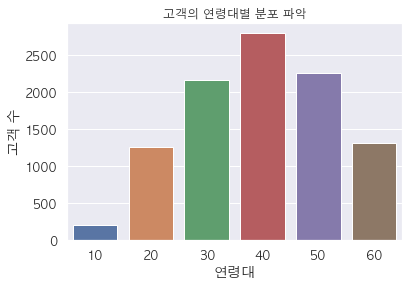

In [23]:
cus_info.loc[cus_info['cus_age'] < 20, 'cus_age_detail'] = 10
cus_info.loc[(cus_info['cus_age'] >= 20)&(cus_info['cus_age'] < 30), 'cus_age_detail'] = 20
cus_info.loc[(cus_info['cus_age'] >= 30)&(cus_info['cus_age'] < 40), 'cus_age_detail'] = 30
cus_info.loc[(cus_info['cus_age'] >= 40)&(cus_info['cus_age'] < 50), 'cus_age_detail'] = 40
cus_info.loc[(cus_info['cus_age'] >= 50)&(cus_info['cus_age'] < 60), 'cus_age_detail'] = 50
cus_info.loc[cus_info['cus_age'] >= 60, 'cus_age_detail'] = 60 

cus_info['cus_age_detail'] = cus_info['cus_age_detail'].astype(int)


ax = sns.countplot('cus_age_detail', data = cus_info)
ax.set_title('고객의 연령대별 분포 파악')
ax.set_xlabel('연령대')
ax.set_ylabel('고객 수')
plt.show()



아직 경제력이 부족한 10대가 가장 적었고, 20대부터 40대까지는 점차 증가하다가 5-60대에 하락하는 것으로 나타났다. 전반적으로 경제활동을 활발히 하고 있는 3-50대가 많은 비중을 차지했으며, 그 중에서도 40대가 가장 많았고 50대가 이를 뒤따르고 있으며 30대는 50대와 근소한 차이를 갖는 것으로 나타났다. 

### (2) 계좌 개설 년도에 따른 주식의 유행화 분석

흔히 사람들은 저축과 같은 보수적인 자산 축적 방식이 불안정해질 때, 단시간에 고수익을 낼 수 있는 주식을 선호하는 경향이 있다. 이에 따라 계좌의 개설 년도를 분석하여 언제 주식이 인기를 끌었고, 그 당시에 어떤 일이 있었는지 알아보고자 한다.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


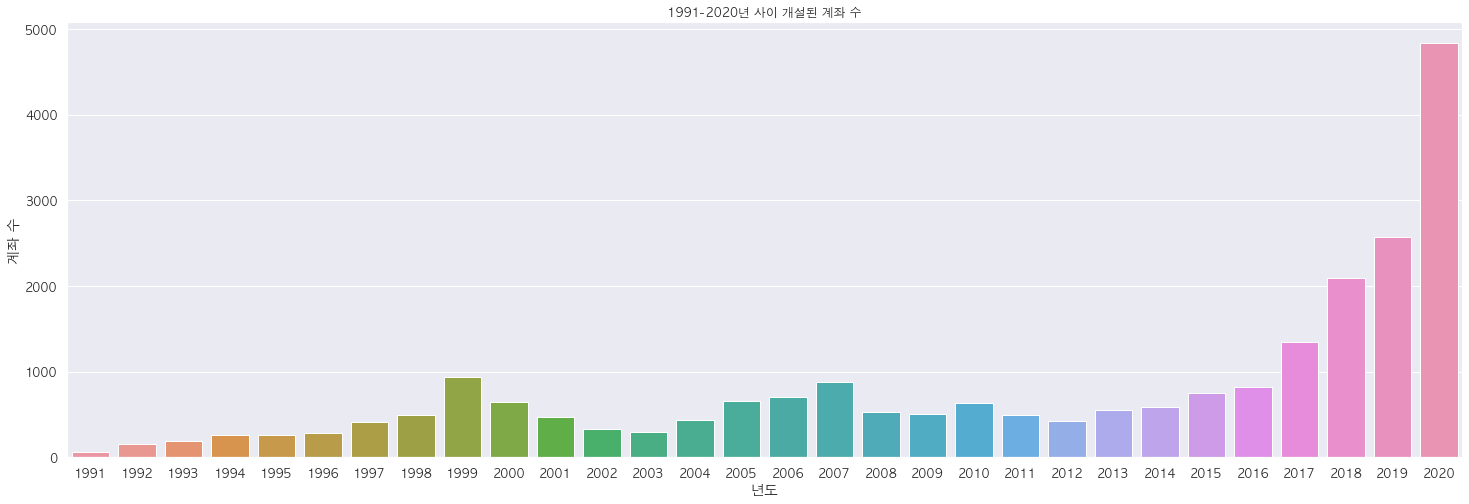

In [28]:
act_info2['act_opn_ym_2'] = act_info2['act_opn_ym'].astype(str)
act_info2['year'] = act_info2['act_opn_ym_2'].str[0:4]
act_info2['year'] = act_info2['year'].astype(int)
act_info2 = act_info2.drop(['act_opn_ym_2'], axis=1) # 계좌 데이터에서 년/월 추출



act_info = act_info2.drop(act_info2[act_info2['year'] < 1991].index) # 최근 30년 동안의 개설 년도 추출
ax = plt.subplots(figsize=(25,8))
ax = sns.countplot('year', data = act_info)
ax.set_title('1991-2020년 사이 개설된 계좌 수')
ax.set_xlabel('년도')
ax.set_ylabel('계좌 수')
plt.show()

계좌 개설이 활발해진 년도로는 1999년, 2007년, 그리고 2017년 이후를 들 수 있다. 1999년에는 1997년 11월 말 발생한 IMF 사태가 한창 이어지고 있었고, 2007년에는 미국발 서브프라임 사태가 전 세계 주식시장에 영향을 미쳤으며 2017년에는 가상화폐인 비트코인의 유행과 더불어 주식 거래도 유행하기 시작해 2015년 이후 처음으로 하루 평균 거래대금이 10조원을 넘기 시작한 해였다. 2020년 현재 하루 평균 거래대금은 32조로, 주식시장이 폭발적으로 증가했음을 보여준다. 2020년의 계좌 개설 수 폭증은 단순한 주식 시장의 확대로 인한 현상일지, 또는 다른 요인이 있는지를 분석해보고자 2019-2020년 사이의 데이터만 추출하여 분석해보고자 한다.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


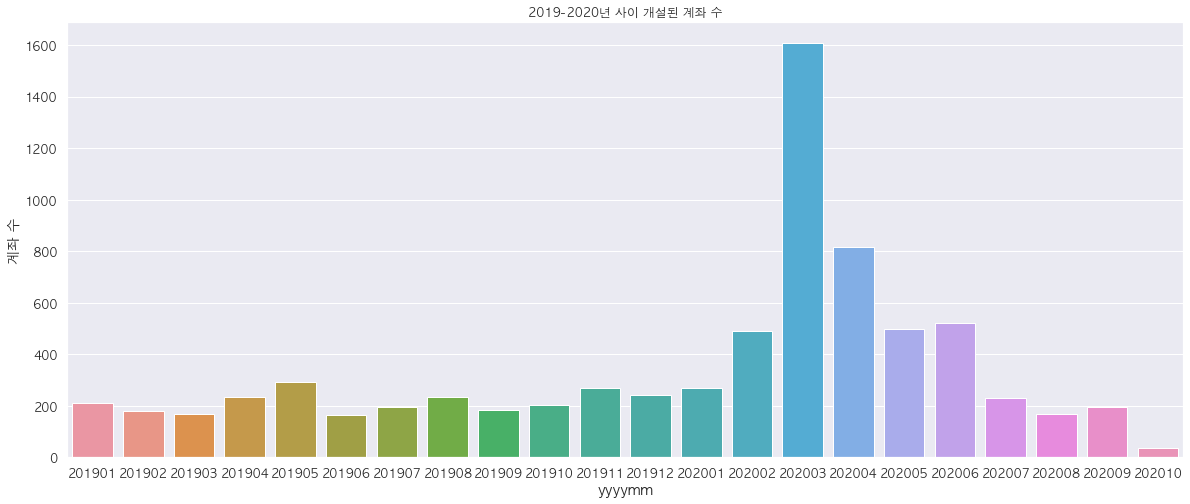

In [30]:
act_info3 = act_info.drop(act_info[act_info['year'] < 2019].index) # 2019-2020년 사이의 데이터만 추출
ax = plt.subplots(figsize=(20,8))
ax = sns.countplot('act_opn_ym', data = act_info3)
ax.set_title('2019-2020년 사이 개설된 계좌 수')
ax.set_xlabel('yyyymm')
ax.set_ylabel('계좌 수')
plt.show()

2020년의 계좌 개설 수 상승세에는 3월에 생성된 계좌 수가 많은 비중을 차지한다는 것을 알 수 있다. 2020년 3월에는 1월 말 유행하기 시작한 코로나바이러스-19의 상승세가 절정에 달했을 때로, 경제상황이 결코 호황이 아니었음을 고려한다면 이는 미래에 대한 불안감으로 인한 주식투자 및 사회적 거리두기로 인한 여가활동 부족의 대체로 주식투자가 자리잡았음을 유추해낼 수 있다. 

### (3) 고객별 계좌 개설 나이 분석

In [71]:
cus_act = pd.merge(cus_info, act_info, on = "cus_id") # 고객정보와 계좌정보 병합하여 cus_act로 명명

cus_act['act_age'] = (cus_act['cus_age'] - (2020 - cus_act['year'])).values

cus_act.loc[cus_act['act_age'] < 20, 'act_age_detail'] = 10
cus_act.loc[(cus_act['act_age'] >= 20)&(cus_act['act_age'] < 30), 'act_age_detail'] = 20
cus_act.loc[(cus_act['act_age'] >= 30)&(cus_act['act_age'] < 40), 'act_age_detail'] = 30
cus_act.loc[(cus_act['act_age'] >= 40)&(cus_act['act_age'] < 50), 'act_age_detail'] = 40
cus_act.loc[(cus_act['act_age'] >= 50)&(cus_act['act_age'] < 60), 'act_age_detail'] = 50
cus_act.loc[cus_act['act_age'] >= 60, 'act_age_detail'] = 60 # 병합한 데이터에 연령대 설정


cus_act['act_age_detail'] = cus_act['act_age_detail'].astype(int)

In [72]:
cus_act_sort = cus_act.sort_values(by=['cus_id', 'year'])
cus_act_sort = cus_act_sort.drop_duplicates("cus_id", keep="first")
# 고객들이 최초로 계좌를 생성한 년도를 나타내는 데이터 cus_act_sort 파생

In [75]:
act_age_detail = cus_act_sort.groupby(['act_age_detail']).size()
act_age_detail
# 고객들이 계좌를 개설하는 나이를 비교한 act_age_detail 데이터 파생

act_age_detail
10     558
20    2889
30    3171
40    2220
50     928
60     206
dtype: int64

고객들은 주로 경제활동을 시작하여 활성화되는 2-40대에 많이 계좌를 개설하는 것으로 나타났고, 그 비율은 각각 20대 29%, 30대 32%, 40대 21% 정도를 기록하고 있다. 이 가운데 y&z세대가 도합 61%로, 절반 이상을 차지하고 있는 것으로 드러나 근래 들어 두 세대에서 주식이 유행하고 있다고 간접적으로 판단할 수 있다. 

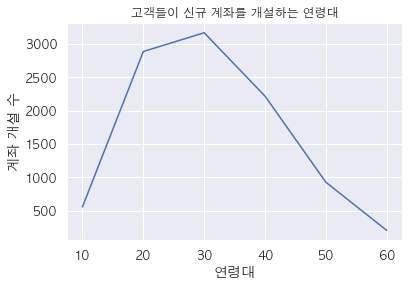

In [76]:
fig, ax = plt.subplots()
ax = act_age_detail.plot()
ax.set_title('고객들이 신규 계좌를 개설하는 연령대')
ax.set_xlabel("연령대")
ax.set_ylabel("계좌 개설 수")
plt.show()

### (4) 고객들의 주식 시작 나이 비교

고객들이 신규 계좌를 개설한 년도를 확인하여, 최근 10년 동안 계좌를 최초로 개설한 고객들의 연령대를 비교하여 그 동향을 분석해보고자 한다. 

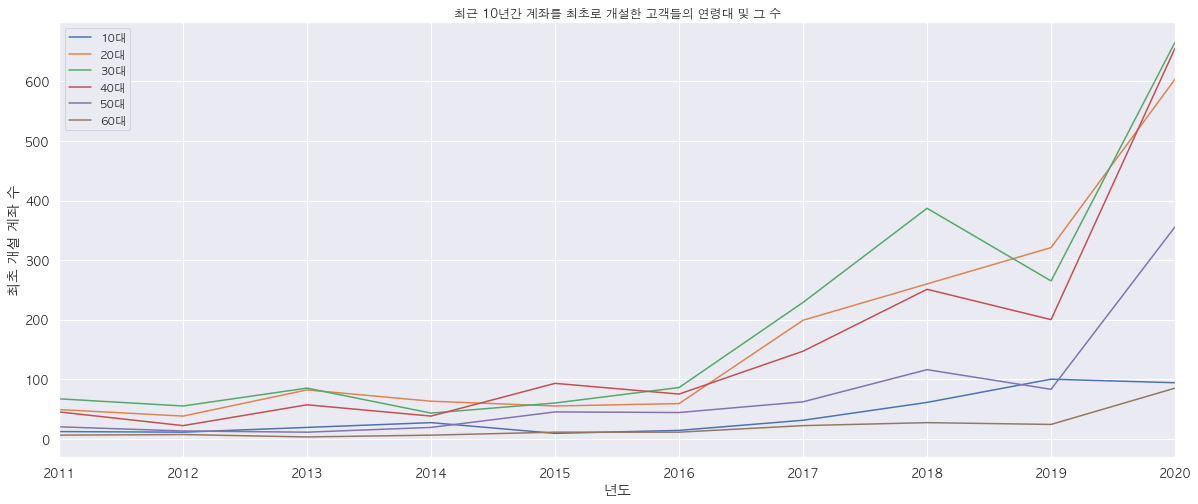

In [80]:
year = cus_act_sort.groupby(['year']).size()

year_10 = cus_act_sort[(cus_act_sort.act_age_detail == 10)].groupby(['year']).size()
year_20 = cus_act_sort[(cus_act_sort.act_age_detail == 20)].groupby(['year']).size()
year_30 = cus_act_sort[(cus_act_sort.act_age_detail == 30)].groupby(['year']).size()
year_40 = cus_act_sort[(cus_act_sort.act_age_detail == 40)].groupby(['year']).size()
year_50 = cus_act_sort[(cus_act_sort.act_age_detail == 50)].groupby(['year']).size()
year_60 = cus_act_sort[(cus_act_sort.act_age_detail == 60)].groupby(['year']).size()

fig, ax = plt.subplots(figsize = (20,8))
ax = year_10.plot(label='10대')
ax = year_20.plot(label='20대')
ax = year_30.plot(label='30대')
ax = year_40.plot(label='40대')
ax = year_50.plot(label='50대')
ax = year_60.plot(label='60대')
ax.set_xlim([2011, 2020])
plt.legend()
ax.set_title('최근 10년간 계좌를 최초로 개설한 고객들의 연령대 및 그 수')
ax.set_xlabel("년도")
ax.set_ylabel("최초 개설 계좌 수")

plt.show()

그래프에서 알 수 있는 것처럼 최근의 계좌 개설 수 증가는 2-40대, 그 가운데서도 y&z세대를 중심으로 이뤄진 것을 확인할 수 있다. 그래프를 2020년으로 한정하여 더욱 자세히 분석해보도록 하겠다. 

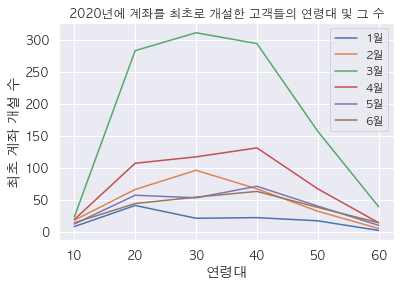

In [81]:
act_age_detail_2020 = cus_act_sort[(cus_act_sort.year == 2020)].groupby(['act_age_detail']).size()

act_age_detail_2020_01 = cus_act_sort[(cus_act_sort.act_opn_ym == 202001)].groupby(['act_age_detail']).size()
act_age_detail_2020_02 = cus_act_sort[(cus_act_sort.act_opn_ym == 202002)].groupby(['act_age_detail']).size()
act_age_detail_2020_03 = cus_act_sort[(cus_act_sort.act_opn_ym == 202003)].groupby(['act_age_detail']).size()
act_age_detail_2020_04 = cus_act_sort[(cus_act_sort.act_opn_ym == 202004)].groupby(['act_age_detail']).size()
act_age_detail_2020_05 = cus_act_sort[(cus_act_sort.act_opn_ym == 202005)].groupby(['act_age_detail']).size()
act_age_detail_2020_06 = cus_act_sort[(cus_act_sort.act_opn_ym == 202006)].groupby(['act_age_detail']).size()

fig, ax = plt.subplots()
ax = act_age_detail_2020_01.plot(label='1월')
ax = act_age_detail_2020_02.plot(label='2월')
ax = act_age_detail_2020_03.plot(label='3월')
ax = act_age_detail_2020_04.plot(label='4월')
ax = act_age_detail_2020_05.plot(label='5월')
ax = act_age_detail_2020_06.plot(label='6월')
plt.legend()
ax.set_title('2020년에 계좌를 최초로 개설한 고객들의 연령대 및 그 수')
ax.set_xlabel("연령대")
ax.set_ylabel("최초 계좌 개설 수")
plt.show()

2020년 상반기의 계좌 개설 현황을 분석해 본 결과, 대부분 2-40대가 차지하고 있엇다. 계좌 개설이 가장 많이 나타난 달은 3월이었으며, 대부분의 연령대에서 2-4월에 계좌가 많이 개설되어 코로나-19의 영향을 짐작할 수 있었다. 

## 2) 세대별 투자 기업 분석

세대별 중요 가치는 세대에 따라 달라지므로 투자 양상 역시 굉장히 달라질 수 밖에 없다. 이 부분에서는 세대별로 투자하는 기업을 분석하여 세대 간의 선호하는 기업 및 그 기업들의 특징을 알아보고자 한다. 이를 위해 앞으로 세대 간 분석 시 Z세대는 편의상 20대로, Y세대는 30대로 간주하여 분석을 진행할 것이다. 그 외의 세대는 X세대라고 불리는 40대와 그 이상으로 구분할 것이다. 10대 이하는 주식 시장에서의 존재감이 크지 않을 것으로 판단하여 분석에서 제외한다. 이때, 코로나-19로 인해 주로 투자하는 주식의 종목이 달라졌는지를 확인하기 위해 2019년과 2020년을 나눠서 분석할 것이다. 

In [174]:
Z_kr = df[(df['cus_age']>=20) & (df['cus_age']<30)]
Z_oss = df2[(df2['cus_age']>=20) & (df2['cus_age']<30)] #국내데이터와 해외데이터에 각각 z세대 데이터 파생

Y_kr = df[(df['cus_age']>=30) & (df['cus_age']<40)]
Y_oss = df2[(df2['cus_age']>=30) & (df2['cus_age']<40)]#국내데이터와 해외데이터에 각각 y세대 데이터 파생

X_kr = df[(df['cus_age']>=40) & (df['cus_age']<50)]
X_oss = df2[(df2['cus_age']>=40) & (df2['cus_age']<50)]#국내데이터와 해외데이터에 각각 x세대 데이터 파생

Ex_kr= df[(df['cus_age']>=50)]
Ex_oss = df2[(df2['cus_age']>=50)] #국내데이터와 해외데이터에 각각 50대 이상 데이터 파생


### (1) 2019년-2020년 사이 국내 기업 투자 분석

In [181]:
Z_kr[(Z_kr["orr_year"] ==2019)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2019년 z세대의 국내 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month
663,삼성전자보통주 ...,924,924,924,924,924,924,924,924,924,...,924,924,924,924,924,924,924,924,924,924
129,국일제지 ...,867,867,867,867,867,867,867,867,867,...,867,867,867,867,867,867,867,867,867,867
463,머큐리 ...,557,557,557,557,557,557,557,557,557,...,557,557,557,557,557,557,557,557,557,557
866,아난티 ...,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
173,남선알미늄보통주 ...,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450
802,신라젠 ...,413,413,413,413,413,413,413,413,413,...,413,413,413,413,413,413,413,413,413,413
1024,에이치엘비 ...,410,410,410,410,410,410,410,410,410,...,410,410,410,410,410,410,410,410,410,410
104,경창산업 ...,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
1193,위지윅스튜디오 ...,379,379,379,379,379,379,379,379,379,...,379,379,379,379,379,379,379,379,379,379
1826,현대바이오사이언스 ...,358,358,358,358,358,358,358,358,358,...,358,358,358,358,358,358,358,358,358,358


In [182]:
Z_kr[(Z_kr["orr_year"] ==2020)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
#2020년 z세대의 국내 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month
778,삼성전자보통주 ...,4056,4056,4056,4056,4056,4056,4056,4056,4056,...,4056,4056,4056,4056,4056,4056,4056,4056,4056,4056
717,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...,3779,3779,3779,3779,3779,3779,3779,3779,3779,...,3779,3779,3779,3779,3779,3779,3779,3779,3779,3779
762,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...,1786,1786,1786,1786,1786,1786,1786,1786,1786,...,1786,1786,1786,1786,1786,1786,1786,1786,1786,1786
1029,씨젠 ...,1722,1722,1722,1722,1722,1722,1722,1722,1722,...,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722
210,남선알미늄보통주 ...,1421,1421,1421,1421,1421,1421,1421,1421,1421,...,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421
1645,카카오보통주 ...,1362,1362,1362,1362,1362,1362,1362,1362,1362,...,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362
1166,에스케이하이닉스보통주 ...,1276,1276,1276,1276,1276,1276,1276,1276,1276,...,1276,1276,1276,1276,1276,1276,1276,1276,1276,1276
777,삼성전자1우선주 ...,1275,1275,1275,1275,1275,1275,1275,1275,1275,...,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
699,빅텍 ...,1245,1245,1245,1245,1245,1245,1245,1245,1245,...,1245,1245,1245,1245,1245,1245,1245,1245,1245,1245
2052,한진칼보통주 ...,1219,1219,1219,1219,1219,1219,1219,1219,1219,...,1219,1219,1219,1219,1219,1219,1219,1219,1219,1219


In [183]:
Y_kr[(Y_kr["orr_year"] ==2019)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2019년 y세대의 국내 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month
784,삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생 ...,5895,5895,5895,5895,5895,5895,5895,5895,5895,...,5895,5895,5895,5895,5895,5895,5895,5895,5895,5895
1257,에이치엘비 ...,5262,5262,5262,5262,5262,5262,5262,5262,5262,...,5262,5262,5262,5262,5262,5262,5262,5262,5262,5262
791,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...,2493,2493,2493,2493,2493,2493,2493,2493,2493,...,2493,2493,2493,2493,2493,2493,2493,2493,2493,2493
171,국일제지 ...,2255,2255,2255,2255,2255,2255,2255,2255,2255,...,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255
808,삼성전자보통주 ...,2143,2143,2143,2143,2143,2143,2143,2143,2143,...,2143,2143,2143,2143,2143,2143,2143,2143,2143,2143
755,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...,1664,1664,1664,1664,1664,1664,1664,1664,1664,...,1664,1664,1664,1664,1664,1664,1664,1664,1664,1664
2033,필룩스보통주 ...,1580,1580,1580,1580,1580,1580,1580,1580,1580,...,1580,1580,1580,1580,1580,1580,1580,1580,1580,1580
996,신라젠 ...,1542,1542,1542,1542,1542,1542,1542,1542,1542,...,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542
1178,에스모 ...,1372,1372,1372,1372,1372,1372,1372,1372,1372,...,1372,1372,1372,1372,1372,1372,1372,1372,1372,1372
1221,에스케이하이닉스보통주 ...,1270,1270,1270,1270,1270,1270,1270,1270,1270,...,1270,1270,1270,1270,1270,1270,1270,1270,1270,1270


In [184]:
Y_kr[(Y_kr["orr_year"] ==2020)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2020년 y세대의 국내 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month
795,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...,9268,9268,9268,9268,9268,9268,9268,9268,9268,...,9268,9268,9268,9268,9268,9268,9268,9268,9268,9268
866,삼성전자보통주 ...,9072,9072,9072,9072,9072,9072,9072,9072,9072,...,9072,9072,9072,9072,9072,9072,9072,9072,9072,9072
848,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...,5049,5049,5049,5049,5049,5049,5049,5049,5049,...,5049,5049,5049,5049,5049,5049,5049,5049,5049,5049
1145,씨젠 ...,3812,3812,3812,3812,3812,3812,3812,3812,3812,...,3812,3812,3812,3812,3812,3812,3812,3812,3812,3812
840,삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생 ...,3561,3561,3561,3561,3561,3561,3561,3561,3561,...,3561,3561,3561,3561,3561,3561,3561,3561,3561,3561
1524,웰크론 ...,3223,3223,3223,3223,3223,3223,3223,3223,3223,...,3223,3223,3223,3223,3223,3223,3223,3223,3223,3223
1078,신풍제약보통주 ...,2893,2893,2893,2893,2893,2893,2893,2893,2893,...,2893,2893,2893,2893,2893,2893,2893,2893,2893,2893
2285,한진칼보통주 ...,2853,2853,2853,2853,2853,2853,2853,2853,2853,...,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853
1292,에스케이하이닉스보통주 ...,2783,2783,2783,2783,2783,2783,2783,2783,2783,...,2783,2783,2783,2783,2783,2783,2783,2783,2783,2783
2041,파미셀보통주 ...,2727,2727,2727,2727,2727,2727,2727,2727,2727,...,2727,2727,2727,2727,2727,2727,2727,2727,2727,2727


In [185]:
X_kr[(X_kr["orr_year"] ==2019)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2019년 x세대의 국내 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month
1863,케이씨그린홀딩스보통주 ...,36654,36654,36654,36654,36654,36654,36654,36654,36654,...,36654,36654,36654,36654,36654,36654,36654,36654,36654,36654
2324,한창보통주 ...,23067,23067,23067,23067,23067,23067,23067,23067,23067,...,23067,23067,23067,23067,23067,23067,23067,23067,23067,23067
1347,에이치엠엠보통주 ...,23041,23041,23041,23041,23041,23041,23041,23041,23041,...,23041,23041,23041,23041,23041,23041,23041,23041,23041,23041
649,미래산업보통주 ...,22090,22090,22090,22090,22090,22090,22090,22090,22090,...,22090,22090,22090,22090,22090,22090,22090,22090,22090,22090
413,데코앤이 ...,14545,14545,14545,14545,14545,14545,14545,14545,14545,...,14545,14545,14545,14545,14545,14545,14545,14545,14545,14545
2412,홈캐스트 ...,14351,14351,14351,14351,14351,14351,14351,14351,14351,...,14351,14351,14351,14351,14351,14351,14351,14351,14351,14351
870,삼성전자보통주 ...,5291,5291,5291,5291,5291,5291,5291,5291,5291,...,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291
2374,현대미포조선보통주 ...,4380,4380,4380,4380,4380,4380,4380,4380,4380,...,4380,4380,4380,4380,4380,4380,4380,4380,4380,4380
1662,이화전기공업 ...,4086,4086,4086,4086,4086,4086,4086,4086,4086,...,4086,4086,4086,4086,4086,4086,4086,4086,4086,4086
182,국일제지 ...,3579,3579,3579,3579,3579,3579,3579,3579,3579,...,3579,3579,3579,3579,3579,3579,3579,3579,3579,3579


In [186]:
X_kr[(X_kr["orr_year"] ==2020)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2020년 x세대의 국내 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month
1835,케이씨그린홀딩스보통주 ...,22370,22370,22370,22370,22370,22370,22370,22370,22370,...,22370,22370,22370,22370,22370,22370,22370,22370,22370,22370
2344,한창보통주 ...,17791,17791,17791,17791,17791,17791,17791,17791,17791,...,17791,17791,17791,17791,17791,17791,17791,17791,17791,17791
862,삼성전자보통주 ...,16638,16638,16638,16638,16638,16638,16638,16638,16638,...,16638,16638,16638,16638,16638,16638,16638,16638,16638,16638
1326,에이치엠엠보통주 ...,12178,12178,12178,12178,12178,12178,12178,12178,12178,...,12178,12178,12178,12178,12178,12178,12178,12178,12178,12178
2428,홈캐스트 ...,11866,11866,11866,11866,11866,11866,11866,11866,11866,...,11866,11866,11866,11866,11866,11866,11866,11866,11866,11866
797,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...,4852,4852,4852,4852,4852,4852,4852,4852,4852,...,4852,4852,4852,4852,4852,4852,4852,4852,4852,4852
1077,신풍제약보통주 ...,4388,4388,4388,4388,4388,4388,4388,4388,4388,...,4388,4388,4388,4388,4388,4388,4388,4388,4388,4388
1140,씨젠 ...,3822,3822,3822,3822,3822,3822,3822,3822,3822,...,3822,3822,3822,3822,3822,3822,3822,3822,3822,3822
632,미래산업보통주 ...,3810,3810,3810,3810,3810,3810,3810,3810,3810,...,3810,3810,3810,3810,3810,3810,3810,3810,3810,3810
230,남선알미늄보통주 ...,3463,3463,3463,3463,3463,3463,3463,3463,3463,...,3463,3463,3463,3463,3463,3463,3463,3463,3463,3463


In [187]:
Ex_kr[(Ex_kr["orr_year"] ==2019)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2019년 50대 이상의 국내 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month
1133,신라젠 ...,8253,8253,8253,8253,8253,8253,8253,8253,8253,...,8253,8253,8253,8253,8253,8253,8253,8253,8253,8253
938,삼성전자보통주 ...,7217,7217,7217,7217,7217,7217,7217,7217,7217,...,7217,7217,7217,7217,7217,7217,7217,7217,7217,7217
1370,에스케이하이닉스보통주 ...,4823,4823,4823,4823,4823,4823,4823,4823,4823,...,4823,4823,4823,4823,4823,4823,4823,4823,4823,4823
1408,에이치엘비 ...,4451,4451,4451,4451,4451,4451,4451,4451,4451,...,4451,4451,4451,4451,4451,4451,4451,4451,4451,4451
936,삼성전기보통주 ...,4294,4294,4294,4294,4294,4294,4294,4294,4294,...,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294
1089,셀트리온보통주 ...,4196,4196,4196,4196,4196,4196,4196,4196,4196,...,4196,4196,4196,4196,4196,4196,4196,4196,4196,4196
195,국일제지 ...,4061,4061,4061,4061,4061,4061,4061,4061,4061,...,4061,4061,4061,4061,4061,4061,4061,4061,4061,4061
1978,케이엠더블유 ...,3401,3401,3401,3401,3401,3401,3401,3401,3401,...,3401,3401,3401,3401,3401,3401,3401,3401,3401,3401
2603,후성 보통주 ...,3303,3303,3303,3303,3303,3303,3303,3303,3303,...,3303,3303,3303,3303,3303,3303,3303,3303,3303,3303
1225,아난티 ...,3135,3135,3135,3135,3135,3135,3135,3135,3135,...,3135,3135,3135,3135,3135,3135,3135,3135,3135,3135


In [189]:
Ex_kr[(Ex_kr["orr_year"] ==2020)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2020년 50대 이상의 국내 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month
893,삼성전자보통주 ...,17904,17904,17904,17904,17904,17904,17904,17904,17904,...,17904,17904,17904,17904,17904,17904,17904,17904,17904,17904
877,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...,8985,8985,8985,8985,8985,8985,8985,8985,8985,...,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985
832,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...,8614,8614,8614,8614,8614,8614,8614,8614,8614,...,8614,8614,8614,8614,8614,8614,8614,8614,8614,8614
2101,파미셀보통주 ...,8152,8152,8152,8152,8152,8152,8152,8152,8152,...,8152,8152,8152,8152,8152,8152,8152,8152,8152,8152
1176,씨젠 ...,7675,7675,7675,7675,7675,7675,7675,7675,7675,...,7675,7675,7675,7675,7675,7675,7675,7675,7675,7675
1112,신풍제약보통주 ...,7301,7301,7301,7301,7301,7301,7301,7301,7301,...,7301,7301,7301,7301,7301,7301,7301,7301,7301,7301
1043,셀트리온보통주 ...,6757,6757,6757,6757,6757,6757,6757,6757,6757,...,6757,6757,6757,6757,6757,6757,6757,6757,6757,6757
1329,에스케이하이닉스보통주 ...,6651,6651,6651,6651,6651,6651,6651,6651,6651,...,6651,6651,6651,6651,6651,6651,6651,6651,6651,6651
247,남선알미늄보통주 ...,6133,6133,6133,6133,6133,6133,6133,6133,6133,...,6133,6133,6133,6133,6133,6133,6133,6133,6133,6133
1884,카카오보통주 ...,5892,5892,5892,5892,5892,5892,5892,5892,5892,...,5892,5892,5892,5892,5892,5892,5892,5892,5892,5892


우선적으로, 전 세대에서 코로나-19 관련주의 거래량이 상위권을 차지하고 있음을 알 수 있었다. 제약회사인 씨젠/신풍제약/파미셀, 마스크를 제조하는 업체인 웰크은 모든 세대에서 2020년 국내 주식 거래량 상위 20위에 들었으며, 20대를 제외한 모든 세대에서 코로나-19 항체치료제를 개발 중인 셀트리온이 순위권에 올랐다. 5-60대를 제외한 모든 세대에서는 또다른 마스크 제조 회사인 미래산업의 주식이 상위권을 차지하고 있었다. 5-60대는 다른 세대와 비교하여 제약과 관련된 주식이 더욱 높은 비중을 차지해, 건강에 대한 그들의 관심을 짐작할 수 있었다. 한편으로는 동시에 삼성전자, 에스케이하이닉스, 카카오 등 대기업의 주식은 코로나의 여파에도 거래량 상위권을 유지하고 있었다. 젊은 층에서 가장 크게 달라진 여행 관련 주식으로, 과거 y&z 세대의 주요 투자 종목이었던 아시아나항공, 에어부산 등은 모두 2020년에는 순위권에서 모습을 감췄다. y세대와 z세대를 비교하였을 때 눈에 띠는 항목은 z세대의 초록뱀미디어와 와이비엠넷이다. 초록뱀미디어는 방송 프로그램 제작업을 담당하는 회사로, 트렌드에 민감한 그들의 특성을 짐작할 수 있다. 그리고 와이비엠넷은 TOEIC과 같은 교육 서비스업을 제공하는 회사로서 취업에 민감한 Z세대의 특성을 보여준다. 

### (2) 2019년-2020년 사이 해외 기업 투자 분석

In [190]:
Z_oss[(Z_oss["orr_year"] ==2019)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2019년 Z세대의 해외 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,cur_cd,trd_cur_xcg_rt,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month,total,sum
20,Direxion:Nat Gas Bull 3X ...,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
1,AMD ...,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
57,VELOCITYSHARES 3X INVERSE NATURA ETN ...,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
87,스타벅스 ...,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
58,VELOCITYSHARES 3X LNG NTRL GS ETN ...,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
144,테슬라 ...,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
4,AT&T ...,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
44,Nortech Systems Incorporated ...,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
29,Global X SuperDividend REIT ...,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
13,CONSUMER DISCRETIONARY SELECT SPDR ...,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


In [177]:
Z_oss[(Z_oss["orr_year"] ==2020)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2020년 Z세대의 해외 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,cur_cd,trd_cur_xcg_rt,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month,total,sum
218,델타 에어라인스 ...,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
440,퍼스트 머제스틱 실버 ...,222,222,222,222,222,222,222,222,222,...,222,222,222,222,222,222,222,222,222,222
246,마이크로소프트 ...,197,197,197,197,197,197,197,197,197,...,197,197,197,197,197,197,197,197,197,197
429,테슬라 ...,180,180,180,180,180,180,180,180,180,...,180,180,180,180,180,180,180,180,180,180
7,AMD ...,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
415,코카콜라 ...,173,173,173,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173
370,월트 디즈니 ...,166,166,166,166,166,166,166,166,166,...,166,166,166,166,166,166,166,166,166,166
279,보잉 ...,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
12,AT&T ...,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
134,ProShares:UltP Sht QQQ ...,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148


In [176]:
Y_oss[(Y_oss["orr_year"] ==2019)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2019년 Y세대의 해외 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,cur_cd,trd_cur_xcg_rt,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month,total,sum
101,테슬라 ...,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
27,VELOCITYSHARES 3X LNG NTRL GS ETN ...,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
79,월트 디즈니 ...,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
62,아머 레지덴셜 리츠 ...,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
71,애플 ...,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
11,FIRST TRUST VALUE LINE DVD ...,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
2,AT&T ...,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
53,비자 ...,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
14,GUGGENHEIM STRATEGIC OPPORTUNITY ...,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
29,글로벌 네트 리스 ...,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [178]:
Y_oss[(Y_oss["orr_year"] ==2020)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2020년 Z세대의 해외 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,cur_cd,trd_cur_xcg_rt,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month,total,sum
171,델타 에어라인스 ...,321,321,321,321,321,321,321,321,321,...,321,321,321,321,321,321,321,321,321,321
197,마이크로소프트 ...,260,260,260,260,260,260,260,260,260,...,260,260,260,260,260,260,260,260,260,260
52,EPR 프로퍼티스 ...,216,216,216,216,216,216,216,216,216,...,216,216,216,216,216,216,216,216,216,216
231,보잉 ...,214,214,214,214,214,214,214,214,214,...,214,214,214,214,214,214,214,214,214,214
262,아머 레지덴셜 리츠 ...,176,176,176,176,176,176,176,176,176,...,176,176,176,176,176,176,176,176,176,176
291,애플 ...,173,173,173,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173
361,테슬라 ...,154,154,154,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154
7,AT&T ...,154,154,154,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154
314,월트 디즈니 ...,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147
350,코카콜라 ...,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [179]:
X_oss[(X_oss["orr_year"] ==2019)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2019년 X세대의 해외 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,cur_cd,trd_cur_xcg_rt,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month,total,sum
89,마이크로소프트 ...,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
6,AT&T ...,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
88,리얼티 인컴 ...,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
23,FuelCell Energy ...,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
26,Global X NASDAQ 100 Covered Call ETF ...,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
125,아이셰어즈20+이어트레저리본드ETF ...,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
115,스타벅스 ...,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
135,애플 ...,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
29,INVESCO S&P 500 HIGH DIVIDEND LOW VOL ...,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
131,알트리아 그룹 ...,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


In [180]:
X_oss[(X_oss["orr_year"] ==2020)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2020년 X세대의 해외 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,cur_cd,trd_cur_xcg_rt,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month,total,sum
246,마이크로소프트 ...,286,286,286,286,286,286,286,286,286,...,286,286,286,286,286,286,286,286,286,286
353,애플 ...,235,235,235,235,235,235,235,235,235,...,235,235,235,235,235,235,235,235,235,235
28,CS VELOCITYSHARES 3X LNG NTRL GS ETN ...,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
5,AT&T ...,182,182,182,182,182,182,182,182,182,...,182,182,182,182,182,182,182,182,182,182
388,월트 디즈니 ...,167,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
243,리얼티 인컴 ...,163,163,163,163,163,163,163,163,163,...,163,163,163,163,163,163,163,163,163,163
224,델타 에어라인스 ...,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
461,테슬라 ...,136,136,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136
159,US 글로벌 제츠 ETF ...,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
308,스타벅스 ...,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105


In [191]:
Ex_oss[(Ex_oss["orr_year"] ==2019)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2019년 50대 이상의 해외 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,cur_cd,trd_cur_xcg_rt,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month,total,sum
116,아이셰어즈 실버 트러스트 ...,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
184,항서의약 ...,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
96,비아적(BYD) ...,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
164,청도하이얼 ...,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
158,중국국여 ...,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
48,Supor ...,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
4,Artis Real ...,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
100,상해자동차 ...,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
180,프로셰어스 울트라숏 다우30 ...,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
153,절강용성 ...,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [192]:
X_oss[(X_oss["orr_year"] ==2020)].groupby('iem_krl_nm',as_index = False).count().sort_values(by = 'iem_eng_nm', ascending = False).head(20)
# 2020년 50대 이상의 해외 주식 거래 수 top20

,iem_krl_nm,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,...,cur_cd,trd_cur_xcg_rt,iem_eng_nm,cus_age_detail,opn_year,opn_month,orr_year,orr_month,total,sum
246,마이크로소프트 ...,286,286,286,286,286,286,286,286,286,...,286,286,286,286,286,286,286,286,286,286
353,애플 ...,235,235,235,235,235,235,235,235,235,...,235,235,235,235,235,235,235,235,235,235
28,CS VELOCITYSHARES 3X LNG NTRL GS ETN ...,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
5,AT&T ...,182,182,182,182,182,182,182,182,182,...,182,182,182,182,182,182,182,182,182,182
388,월트 디즈니 ...,167,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
243,리얼티 인컴 ...,163,163,163,163,163,163,163,163,163,...,163,163,163,163,163,163,163,163,163,163
224,델타 에어라인스 ...,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
461,테슬라 ...,136,136,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136
159,US 글로벌 제츠 ETF ...,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
308,스타벅스 ...,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105


세대 간의 차이는 국내 주식에서보다 해외 주식에서 명확하게 존재함을 알 수 있다. 대부분 거래량이 2자리 수에 머물거나 3자리 수 초반을 기록하고 있는 중장년층과 달리, 상대적으로 서구권과 해외 거래 방식이 익숙한 y&z세대에서는 그보다 훨씬 많은 거래량을 보이고 있다. 이는 요즘 광풍을 일으키고 있는 일명 '서학개미' (해외 주식에 주로 투자하는 사람들) 들의 부상과 깊은 연관성을 가지는 것으로 보인다. 항목에서도 세대 간의 차이는 명확하다. 한국에도 널리 알려져 있는 마이크로소프트, 애플, 스타벅스 등의 기업을 제외했을 때 y&z 세대에서는 4차 산업혁명과 관련된 주식들의 거래량이 두드러졌다. 대표적으로 민간인 우주여행을 추진하고 있는 민간 우주개발업체 버진 갤러틱 (Virgin Galatic), 모바일 차량 예약 서비스업체 우버 (Uber), 신흥 기술 개발에 필수적인 은을 채굴하는 업체인 퍼스트 머제스틱 실버 (First Magestic Silver) 가 그 예시이다. 한편, 여행과 항공 관련 업체가 자취를 감춘 국내 시장과 다르게 해외의 경우에는 이러한 업체들 (항공사 - 보잉/델타 에어라인스, 크루즈 - 카니발, 숙박업체 - 아머 레지덴셜 리츠 등)이 꾸준히 거래되고 있는데,이는 미국에서 이러한 업체들의 주가가 떨어진 틈을 타 대량으로 구매한 것으로 보인다. 한편 중장년층은 첨단 기술이라기 보다는 전통적인 컴퓨터 업계 (인텔, 알파벳 CLASS A 등) 이나 의료 (이노비오 파마수티컬스, 오가노보 홀딩스 등) 영역이 두드러졌다. 그리고 y&z세대는 2019-2020년 모두 대부분 미국 주식에 주로 투자하는 반면, 그 이상의 연령대에서는 중국 주식의 비중이 무시할 수 없는 것으로 나타났다. 비록 코로나-19 발생 이후 중국 주식의 비중이 크게 하락했지만, 여전히 중국 전기차 업체인 NIO inc가 순위권에 올라있는 것이 그 예시이다.   

## (3) 세대별 투자국가 분석

### (1) 세대별 주거래국가 분석

In [162]:
def test(x):
    if x ==1:
        return 1
    else:
        return -1
        

df2['sby'] = df2.sby_dit_cd.apply(test)
df2['total'] = df2['cns_qty'] * df2['orr_pr']
df2['sum'] = df2['total'] * df2['sby']


  # 체결 당시의 외화단가를 체결수량과 곱해 총 거래 금액을 구하고, 매도/매수에 따라 +/-를 적용하여 거래 합계를 구함

In [163]:
df2 =df2.drop("sby", axis = "columns")

In [164]:
df2.groupby("cur_cd")['cus_id'].count().to_frame()

,cus_id
cur_cd,
AUD,6
CAD,66
CNY,1529
EUR,51
GBP,37
HKD,236
IDR,74
JPY,97
SGD,30


미국 주식의 거래량이 압도적이었고, 그 뒤를 중국, 홍콩, 베트남 등이 뒤를 이었다.

In [165]:
df2.groupby("cur_cd")["sum"].sum().to_frame()

,sum
cur_cd,
AUD,-1.797400e+02
CAD,3.023274e+05
CNY,2.138596e+06
EUR,-7.561595e+03
GBP,-1.454882e+04
HKD,4.476010e+05
IDR,7.632450e+07
JPY,-8.728990e+06
SGD,5.703600e+03


인도, 중국, 홍콩, 캐나다의 주식에서는 전반적으로 이익을 본 것으로 드러났고, 미국, 일본 등의 국가에서는 손해를 본 것으로 드러났다. 이러한 전반적인 양상과 세대 간의 양상이 부합하는지, 차이점이 있다면 어떤지를 알아보도록 할 것이다.

In [172]:
a = Z_oss.groupby("cur_cd")["cus_age"].count().to_frame()
a = a.rename(columns={'cus_age':'Z세대(20대)'})

b = Y_oss.groupby("cur_cd")["cus_age"].count().to_frame()
b = b.rename(columns={'cus_age':'Y세대(30대)'})

c = X_oss.groupby("cur_cd")["cus_age"].count().to_frame()
c = c.rename(columns={'cus_age':'X세대(40대)'})

d = Ex_oss.groupby("cur_cd")["cus_age"].count().to_frame()
d = d.rename(columns={'cus_age':'50대 이상'})


currency = pd.merge(a,b,on = 'cur_cd', how = 'outer')
currency = pd.merge(currency,c,on = 'cur_cd',how = 'outer')
currency = pd.merge(currency,d,on = 'cur_cd', how = 'outer')
currency.fillna(0)

,Z세대(20대),Y세대(30대),X세대(40대),50대 이상
cur_cd,,,,
AUD,6,6,0.0,0.0
CAD,66,66,9.0,44.0
CNY,1529,1529,130.0,1283.0
EUR,51,51,24.0,0.0
GBP,37,37,2.0,3.0
HKD,236,236,83.0,131.0
IDR,74,74,33.0,40.0
JPY,97,97,41.0,8.0
SGD,30,30,30.0,0.0


모든 세대에서 미국 주식의 거래량이 가장 많았으며, 특히 Z세대에서 그 비율이 높게 나타났다. 이는 주식 초보자들이 많은 Z세대에서 유명하고 익숙한 기업이 많은 미국 주식을 선호하고 있다고 볼 수 있다. 그 다음으로는 전 세대에서 중국 주식의 거래량이 뒤를 이었는데, Y&Z세대보다는 그 이전 세대들에게서 더 많은 거래량을 기록하여 세대 간 거래하는 주식의 국가에 차이가 있다는 것을 알 수 있다. 한편 Y&Z세대는 그 윗세대들에 비해 일본 주식에 대한 거래량이 큰데, 윗 세대가 중국과 홍콩 등 중화권 주식에 대한 거래량이 큰 것과 대비되는 결과를 보인다.그리고 Y세대는 타 세대와 비교했을 때 독보적으로 영국 주식을 거래하고 있는 것으로 드러났다.

In [193]:
a = cur_Z.groupby("cur_cd")["cns_qty"].sum().to_frame()
a = a.rename(columns={'cus_age':'Z세대(20대)'})

b = cur_Y.groupby("cur_cd")["cns_qty"].sum().to_frame()
b = b.rename(columns={'cus_age':'Y세대(30대)'})

c = cur_X.groupby("cur_cd")["cns_qty"].sum().to_frame()
c = c.rename(columns={'cus_age':'X세대(40대)'})

d = cur_Ex.groupby("cur_cd")["cns_qty"].sum().to_frame()
d = d.rename(columns={'cus_age':'50대 이상'})


currency = pd.merge(a,b,on = 'cur_cd', how = 'outer')
currency = pd.merge(currency,c,on = 'cur_cd',how = 'outer')
currency = pd.merge(currency,d,on = 'cur_cd', how = 'outer')
currency.fillna(0)

,cns_qty_x,cns_qty_y,cns_qty_x,cns_qty_y
cur_cd,,,,
AUD,2.0,2046.0,0.0,0.0
CAD,2816.0,1533.0,2200.0,22052.0
CNY,5000.0,42800.0,42000.0,1364442.0
EUR,120.0,3.0,57.0,0.0
GBP,1438.0,234007.0,2.0,10.0
HKD,21600.0,54000.0,262270.0,779900.0
JPY,5629.0,8200.0,14869.0,5600.0
USD,717163.0,420002.0,313195.0,670121.0
VND,4450.0,17700.0,17320.0,33020.0


거래량과 거래 금액은 대체로 비례하는 것으로 보인다. 미국 주식에 대한 거래량이 가장 많았던 만큼 거래 금액 역시도 가장 많았다. 이는 특히 주식 거래에서 미국 주식이 가장 큰 비중을 차지하는 Z세대에서 특히 두드러졌다. Y세대는 미국 주식에 대한 거래 금액은 그렇게 크지 않은데, 대신 다른 세대에서는 거의 찾아볼 수 없는 영국 주식의 거래 금액이 눈에 띄게 나타나고 있다.

### (2) 세대별 2019-2020년 해외 주식 구매 분석

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


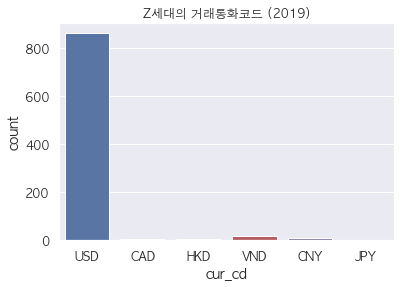

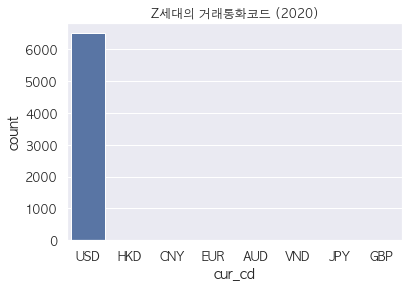

In [197]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data =Z_oss[(Z_oss["orr_year"] == 2019)]) 
ax.set_title('Z세대의 거래통화코드 (2019)')
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data = Z_oss[(Z_oss["orr_year"] == 2020)]) 
ax.set_title('Z세대의 거래통화코드 (2020)')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


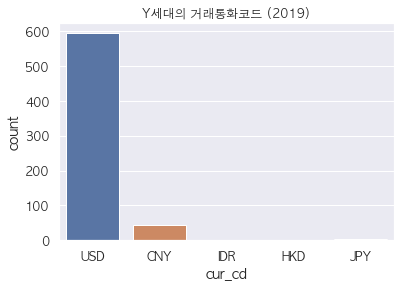

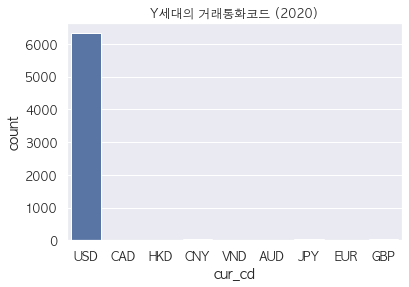

In [196]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data =Y_oss[(Y_oss["orr_year"] == 2019)]) 
ax.set_title('Y세대의 거래통화코드 (2019)')
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data = Y_oss[(Y_oss["orr_year"] == 2020)]) 
ax.set_title('Y세대의 거래통화코드 (2020)')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


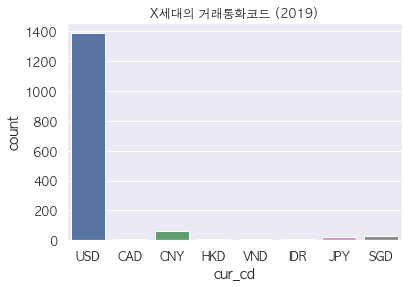

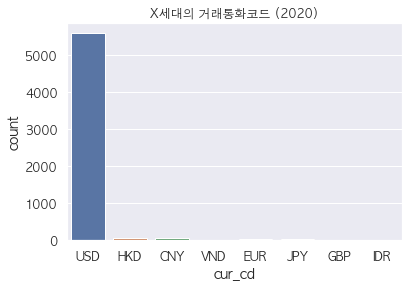

In [198]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data =X_oss[(X_oss["orr_year"] == 2019)]) 
ax.set_title('X세대의 거래통화코드 (2019)')
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data = X_oss[(X_oss["orr_year"] == 2020)]) 
ax.set_title('X세대의 거래통화코드 (2020)')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


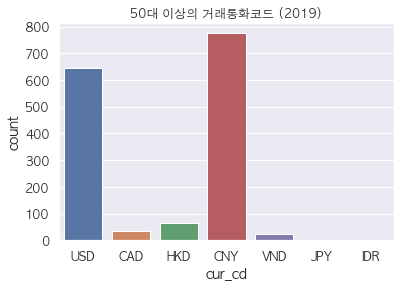

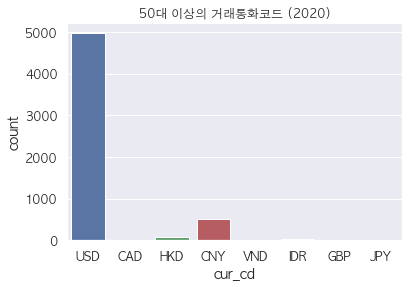

In [199]:
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data =Ex_oss[(Ex_oss["orr_year"] == 2019)]) 
ax.set_title('50대 이상의 거래통화코드 (2019)')
ax = plt.subplots() 
ax = sns.countplot('cur_cd', data = Ex_oss[(Ex_oss["orr_year"] == 2020)]) 
ax.set_title('50대 이상의 거래통화코드 (2020)')
plt.show()

전반적으로 코로나-19를 겪고 있는 2020년에는 중국 주식의 거래량이 급감한 것을 확인할 수 있다. 이는 코로나-19의 발원지로서 중국이 2020년 1,2분기 경제 성장률의 침체를 겪었기 때문에 이에 따른 주식 거래량 감소가 나타난 것으로 생각할 수 있다. 그에 따라 전 세대 모두 미국 주식에 대한 거래량이 증가하였는데, 특히 Z세대에게의 미국 주식은 해외 주식들 가운데 절대적인 비중을 차지하고 있는 것으로 드러났다. 

## (4) 세대에 따른 투자 양상 알아보기

### (1) 연령대별 투자 유형 분석

In [105]:
Y = cus_info[(cus_info["cus_age_detail"] ==30)]
Z = cus_info[(cus_info["cus_age_detail"] ==20)]
X = cus_info[(cus_info["cus_age_detail"] ==40)]
Ex = cus_info[(cus_info["cus_age_detail"] > 40)]

In [109]:
Y.groupby('ivs_icn_cd')['cus_id'].count().to_frame()

,cus_id
ivs_icn_cd,
-,803
00,42
01,9
02,257
03,359
04,429
05,264
09,1


In [110]:
Z.groupby('ivs_icn_cd')['cus_id'].count().to_frame()

,cus_id
ivs_icn_cd,
-,453
00,18
01,97
02,280
03,220
04,147
05,39


In [111]:
X.groupby('ivs_icn_cd')['cus_id'].count().to_frame()

,cus_id
ivs_icn_cd,
-,1288
00,53
01,23
02,234
03,360
04,527
05,313


In [112]:
Ex.groupby('ivs_icn_cd')['cus_id'].count().to_frame()

,cus_id
ivs_icn_cd,
-,1676
00,50
01,35
02,285
03,533
04,702
05,290
09,1


In [ ]:
고객투자유형에서 '00'은 정보제공미동의, '01'은 안정형, '02'는 안전추구형, '03'은 위험중립형, '04'는 전문투자형, '05'는 공격투자형, 
마지막으로 '09'는 전문투자자형을 뜻한다. 범주의 숫자가 커질 수록 적극적인 투자유형이라고 할 수 있는데, 위의 데이터세트들은 파이차트로 옮겨본 결과는 다음과 같다. 

<ipython-input-115-cbdba1b4a9b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['ivs_icn_cd'] = Y['ivs_icn_cd'].replace('-','')
<ipython-input-115-cbdba1b4a9b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['count'] = 1


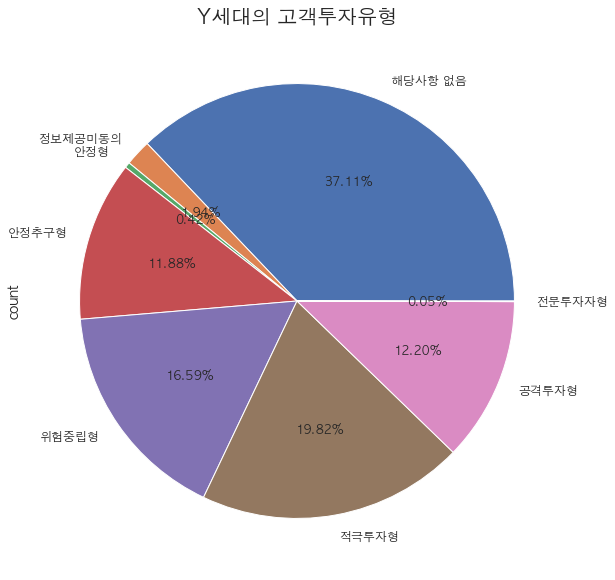

In [115]:
Y['ivs_icn_cd'] = Y['ivs_icn_cd'].replace('-','')
Y.dropna(axis = 0, how = 'any')

Y['count'] = 1
Y_pie = Y.groupby('ivs_icn_cd').count()
Y_pie.index = ['해당사항 없음','정보제공미동의','안정형','안정추구형','위험중립형','적극투자형','공격투자형','전문투자자형']
Y_pie['count'].plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%')
plt.title('Y세대의 고객투자유형', size = 20)
plt.axis = ('equal')
plt.show()  # Y세대의 고객투자유형을 파악하기 위한 파이차트 작성

<ipython-input-116-a15e7cb15d43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['ivs_icn_cd'] = Z['ivs_icn_cd'].replace('-','')
<ipython-input-116-a15e7cb15d43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['count'] = 1


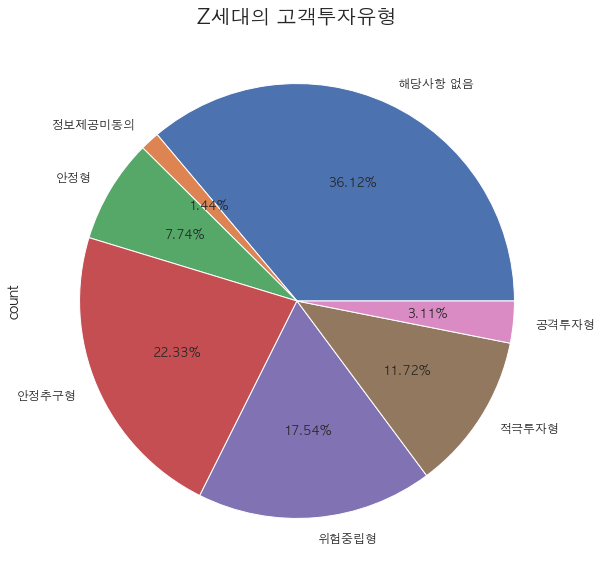

In [116]:
Z['ivs_icn_cd'] = Z['ivs_icn_cd'].replace('-','')
Z.dropna(axis = 0, how = 'any')

Z['count'] = 1
Z_pie = Z.groupby('ivs_icn_cd').count()
Z_pie.index = ['해당사항 없음','정보제공미동의','안정형','안정추구형','위험중립형','적극투자형','공격투자형']
Z_pie['count'].plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%')
plt.title('Z세대의 고객투자유형', size = 20)
plt.axis = ('equal')
plt.show() # Z세대의 고객투자유형을 파악하기 위한 파이차트 작성

<ipython-input-119-bf2829cb45b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ivs_icn_cd'] = X['ivs_icn_cd'].replace('-','')
<ipython-input-119-bf2829cb45b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['count'] = 1


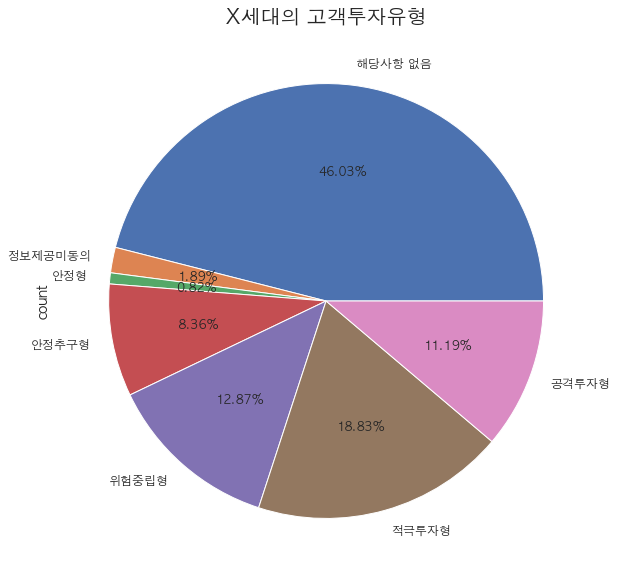

In [119]:
X['ivs_icn_cd'] = X['ivs_icn_cd'].replace('-','')
X.dropna(axis = 0, how = 'any')

X['count'] = 1
X_pie = X.groupby('ivs_icn_cd').count()
X_pie.index = ['해당사항 없음','정보제공미동의','안정형','안정추구형','위험중립형','적극투자형','공격투자형']
X_pie['count'].plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%')
plt.title('X세대의 고객투자유형', size = 20)
plt.axis = ('equal')
plt.show()  # X세대의 고객투자유형을 파악하기 위한 파이차트 작성

<ipython-input-120-6826857f9ec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ex['ivs_icn_cd'] = Ex['ivs_icn_cd'].replace('-','')
<ipython-input-120-6826857f9ec0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ex['count'] = 1


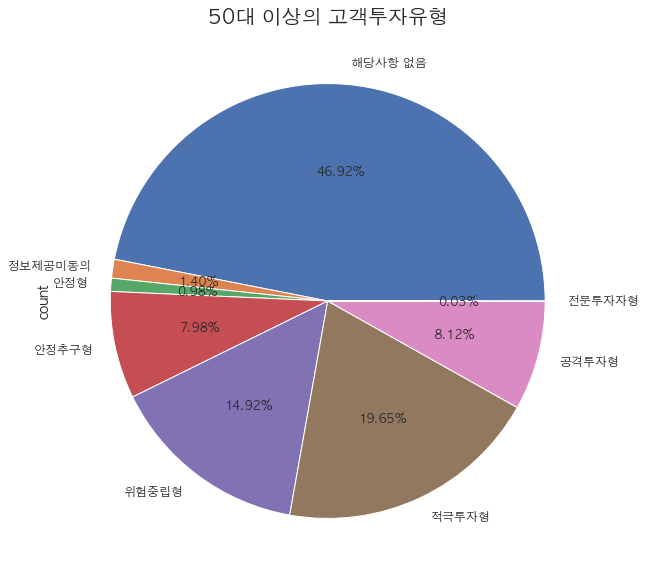

In [120]:
Ex['ivs_icn_cd'] = Ex['ivs_icn_cd'].replace('-','')
Ex.dropna(axis = 0, how = 'any')

Ex['count'] = 1
Ex_pie = Ex.groupby('ivs_icn_cd').count()
Ex_pie.index = ['해당사항 없음','정보제공미동의','안정형','안정추구형','위험중립형','적극투자형','공격투자형','전문투자자형']
Ex_pie['count'].plot(kind = 'pie', figsize = (10,10), autopct = '%1.2f%%')
plt.title('50대 이상의 고객투자유형', size = 20)
plt.axis = ('equal')
plt.show()  # 50대 이상의 고객투자유형을 파악하기 위한 파이차트 작성

각 세대 간의 투자유형을 파이차트로 나타낸 결과, 해당사항 없음과 정보제공미동의를 제외한 값 가운데 적극적 투자유형으로 분류할 수 있는 유형 (적극투자형, 공격투자형, 전문투자자형)의 비율은 Y세대 32.07%, Z세대 14.88%, X세대 30.2%, 50대 이상 세대 27.8%이다. 이를 통해 y세대가 평균적으로 가장 적극적인 유형이고, Z세대가 가장 소극적인 유형처럼 보인다. 그러나 이는 보통 젊은 세대일수록 더욱 과감한 투자를 단행한다는 사회적 통념과는 부합하지 않는 결과이다. Z세대가 비록 적극적인 투자유형의 비율은 가장 작지만, 위험중립형의 비율은 전체 세대에서 2번째로 크다는 것으로 생각하면 그들이 무작정 신중한 세대라고도 할 수 없을 것이다. 이에 숨겨진 이유를 알아보기 위해 세대별 고객등급유형과 투자유형의 연관성을 분석해볼 것이다. 

### (2) 세대별 자금력 차이 분석 

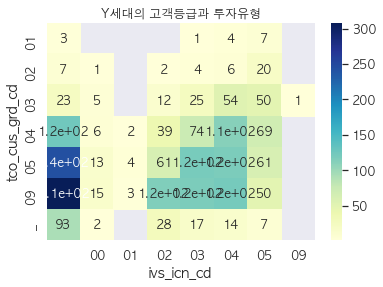

In [122]:
Y_pivot = Y.groupby(['tco_cus_grd_cd','ivs_icn_cd'], as_index = False).count().drop(['sex_dit_cd','cus_id','cus_age'],axis = "columns")
Y_pivot = Y_pivot.pivot ('tco_cus_grd_cd', 'ivs_icn_cd','count')

Y_pivot.fillna(0)

ax = sns.heatmap(Y_pivot, cmap = 'YlGnBu',annot = True)
plt.title('Y세대의 고객등급과 투자유형')
plt.show()

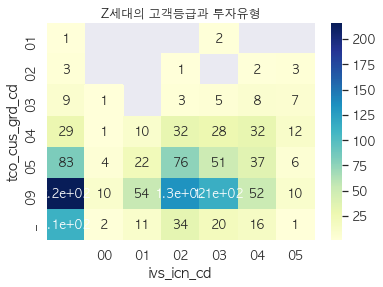

In [123]:
Z_pivot = Z.groupby(['tco_cus_grd_cd','ivs_icn_cd'], as_index = False).count().drop(['sex_dit_cd','cus_id','cus_age'],axis = "columns")
Z_pivot = Z_pivot.pivot ('tco_cus_grd_cd','ivs_icn_cd','count')
Z_pivot.fillna(0)

ax = sns.heatmap(Z_pivot, cmap = 'YlGnBu',annot = True)
plt.title('Z세대의 고객등급과 투자유형')
plt.show()

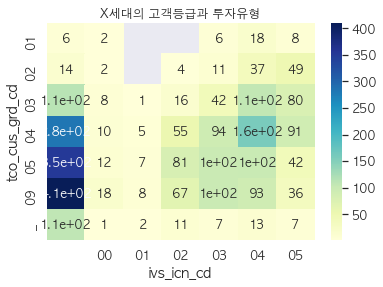

In [125]:
X_pivot = X.groupby(['tco_cus_grd_cd','ivs_icn_cd'], as_index = False).count().drop(['sex_dit_cd','cus_id','cus_age'],axis = "columns")
X_pivot = X_pivot.pivot ('tco_cus_grd_cd', 'ivs_icn_cd','count')

X_pivot.fillna(0)

ax = sns.heatmap(X_pivot, cmap = 'YlGnBu',annot = True)
plt.title('X세대의 고객등급과 투자유형')
plt.show()

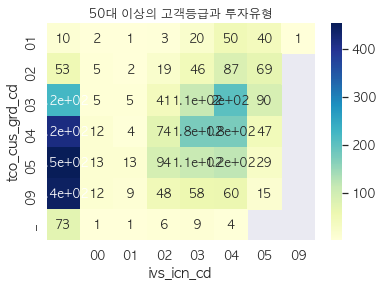

In [126]:
Ex_pivot = Ex.groupby(['tco_cus_grd_cd','ivs_icn_cd'], as_index = False).count().drop(['sex_dit_cd','cus_id','cus_age'],axis = "columns")
Ex_pivot = Ex_pivot.pivot ('tco_cus_grd_cd', 'ivs_icn_cd','count')

Ex_pivot.fillna(0)

ax = sns.heatmap(Ex_pivot, cmap = 'YlGnBu',annot = True)
plt.title('50대 이상의 고객등급과 투자유형')
plt.show()

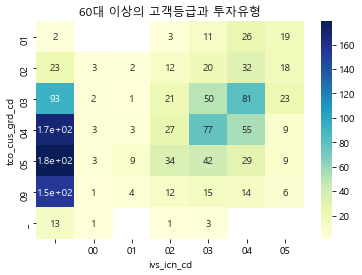

In [ ]:
Ex3_pivot = Ex3.groupby(['tco_cus_grd_cd','ivs_icn_cd'], as_index = False).count().drop(['sex_dit_cd','cus_id','cus_age'],axis = "columns")
Ex3_pivot = Ex3_pivot.pivot ('tco_cus_grd_cd', 'ivs_icn_cd','count')

Ex3_pivot.fillna(0)

ax = sns.heatmap(Ex3_pivot, cmap = 'YlGnBu',annot = True)
plt.title('60대 이상의 고객등급과 투자유형')
plt.show()

세대 간의 고객등급과 고객투자성향을 히트맵으로 비교해 본 결과, 전반적으로 안전을 추구하는 고객의 경우 고객등급이 높지 않았고, 위험을 추구하는 유형은 그보다는 높은 고객등급을 갖고 있는 것을 확인할 수 있었다. 즉 Z세대가 Y세대에 비해 투자성향이 안전을 추구하는 것은 주식에 투자할 만큼의 자본이 부족하기 때문으로 해석할 수 있으며, 상대적으로 자본이 많은 Y세대는 이를 기반으로 적극적 투자전략을 펼친다고 볼 수 있다. 

## (5) 세대별 주식거래 방법

In [134]:
df.groupby("orr_mdi_dit_cd")["cus_id"].count().to_frame()

,cus_id
orr_mdi_dit_cd,
1,68594
2,2733
3,2556999
4,684338


In [129]:
df2.groupby("orr_mdi_dit_cd")["cus_id"].count().to_frame()

,cus_id
orr_mdi_dit_cd,
1,1991
3,26489
4,821


0번은 영업점단말, 1번은 유선단말, 2번은 무선단말, 3번은 HTS (Home Trading System, 컴퓨터로 거래), 4번은 '기타' 항목으로서 유/무선 단말기를 사용하지 않은 MTS (Mobile Trading System)으로 추측된다. 국내의 경우 0번을 제외한 모든 유형이 나타난 반면, 해외의 경우 무선단말을 통한 거래는 발생하지 않는 것으로 드러났다. 두 경우 모두 HTS가 가장 많은 것은 동일했으나 국내의 경우 MTS가, 해외의 경우 유선단말이 그 뒤를 이었다. 이러한 양상에 세대 간의 차이가 있을지 분석해볼 것이다. 

In [144]:
orr_kr = df[['cus_age','orr_mdi_dit_cd']]
orr_oss = df2[['cus_age','orr_mdi_dit_cd']]

orr_kr_Y = orr_kr[(orr_kr['cus_age']>25) & (orr_kr['cus_age']<40)]
orr_oss_Y = orr_oss[(orr_oss['cus_age']>25) & (orr_oss['cus_age']<40)]

orr_kr_Z =orr_kr[(orr_kr['cus_age']>15) & (orr_kr['cus_age']<30)]
orr_oss_Z = orr_oss[(orr_oss['cus_age']>15) & (orr_oss['cus_age']<30)]

orr_kr_X =orr_kr[(orr_kr['cus_age']>35) & (orr_kr['cus_age']<50)]
orr_oss_X = orr_oss[(orr_oss['cus_age']>35) & (orr_oss['cus_age']<50)]

orr_kr_Ex =orr_kr[(orr_kr['cus_age']>45)]
orr_oss_Ex = orr_oss[(orr_oss['cus_age']>45)]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '빈도')

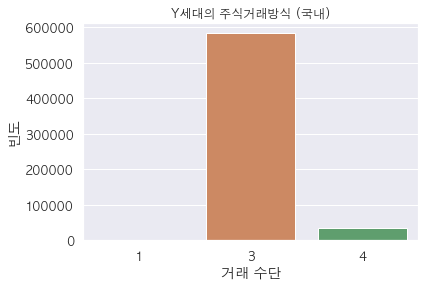

In [145]:
orr_kr_Y.groupby('orr_mdi_dit_cd').count()
ax = sns.countplot('orr_mdi_dit_cd', data = orr_kr_Y)
ax.set_title('Y세대의 주식거래방식 (국내)') 
ax.set_xlabel('거래 수단') 
ax.set_ylabel('빈도') 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '빈도')

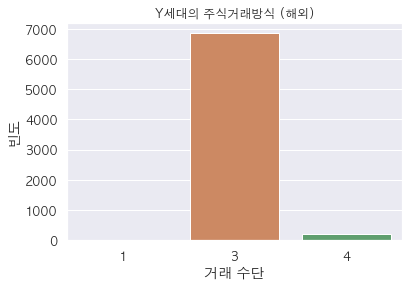

In [146]:
orr_oss_Y.groupby('orr_mdi_dit_cd').count()
ax = sns.countplot('orr_mdi_dit_cd', data = orr_oss_Y)
ax.set_title('Y세대의 주식거래방식 (해외)') 
ax.set_xlabel('거래 수단') 
ax.set_ylabel('빈도') 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '빈도')

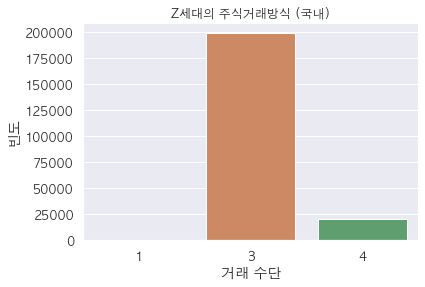

In [147]:
orr_kr_Z.groupby('orr_mdi_dit_cd').count()
ax = sns.countplot('orr_mdi_dit_cd', data = orr_kr_Z)
ax.set_title('Z세대의 주식거래방식 (국내)') 
ax.set_xlabel('거래 수단') 
ax.set_ylabel('빈도') 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '빈도')

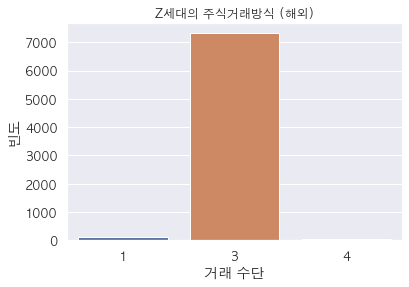

In [149]:
orr_oss_Z.groupby('orr_mdi_dit_cd').count()
ax = sns.countplot('orr_mdi_dit_cd', data = orr_oss_Z)
ax.set_title('Z세대의 주식거래방식 (해외)') 
ax.set_xlabel('거래 수단') 
ax.set_ylabel('빈도') 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '빈도')

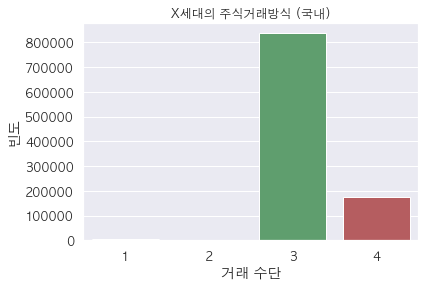

In [150]:
orr_kr_X.groupby('orr_mdi_dit_cd').count()
ax = sns.countplot('orr_mdi_dit_cd', data = orr_kr_X)
ax.set_title('X세대의 주식거래방식 (국내)') 
ax.set_xlabel('거래 수단') 
ax.set_ylabel('빈도') 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '빈도')

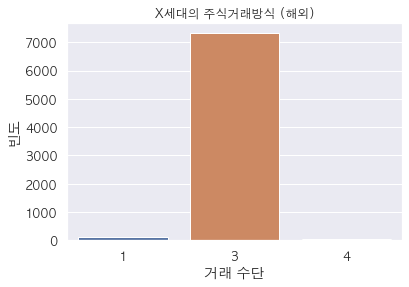

In [151]:
orr_oss_X.groupby('orr_mdi_dit_cd').count()
ax = sns.countplot('orr_mdi_dit_cd', data = orr_oss_Z)
ax.set_title('X세대의 주식거래방식 (해외)') 
ax.set_xlabel('거래 수단') 
ax.set_ylabel('빈도') 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '빈도')

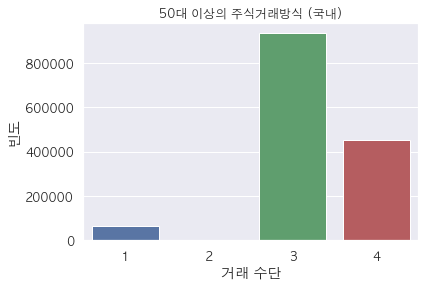

In [153]:
orr_kr_Ex.groupby('orr_mdi_dit_cd').count()
ax = sns.countplot('orr_mdi_dit_cd', data = orr_kr_Ex)
ax.set_title('50대 이상의 주식거래방식 (국내)') 
ax.set_xlabel('거래 수단') 
ax.set_ylabel('빈도')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '빈도')

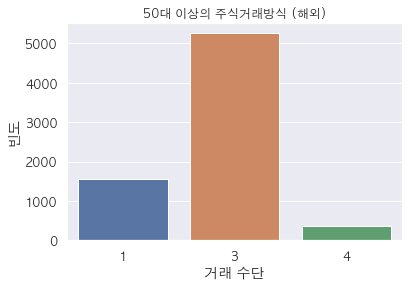

In [155]:
orr_oss_Ex.groupby('orr_mdi_dit_cd').count()
ax = sns.countplot('orr_mdi_dit_cd', data = orr_oss_Ex)
ax.set_title('50대 이상의 주식거래방식 (해외)') 
ax.set_xlabel('거래 수단') 
ax.set_ylabel('빈도')

집단 간 차이가 그렇게 두드러지게 드러나지 않아, 세대 간 거래 방식의 차이는 없다고 해도 무방하다.

국내 거래의 경우도 유선단말을 사용한 비중은 크지 않았다. 그러나 y&z세대에서는 아예 보이지 않았던 방식이 그 외 세대에서 나타나는 것으로 드러났기 때문에, 이 경우에도 세대 간 거래 방법에는 약간의 차이가 있다고 볼 수 있다. 그 외에는 해외 거래의 경우와 동일한 순서를 보였다. 

# (4) 세대별 주거래국가 분석

In [ ]:
def test(x):
    if x ==1:
        return 1
    else:
        return -1
        

df[['cus_age','cur_cd','cns_qty','orr_pr','sby_dit_cd']]
df['sby'] = df.sby_dit_cd.apply(test)
df['total'] = df['cns_qty'] * df['orr_pr']
df['sum'] = df['total'] * df['sby']

df =df.drop("sby", axis = "columns")

df  # 체결 당시의 외화단가를 체결수량과 곱해 총 거래 금액을 구하고, 매도/매수에 따라 +/-를 적용하여 거래 합계를 구함




,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,orr_ord,...,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt,iem_eng_nm,iem_krl_nm,total,sum
0,2582f8ba6a49867ee265a2382d9a07cd4bee71d9e95c7a...,1,70,11,03,03,fc09e95cd23235accca3dad2a8b95c25044b6790195d3a...,200710,20200129,1,...,1,44.0,212.5000,1,USD,1176.7,Alibaba ...,알리바바 그룹 홀딩 ...,9350.0000,9350.0000
1,5b4bd1d5fa738513eb1697b4687b0cc29e1eb275e2cbbf...,1,65,41,03,05,2aa84ccccff5c8a34a536c38509ec65176a111b7a35f41...,201501,20191219,1,...,1,100.0,210.1300,1,USD,1165.3,Alibaba ...,알리바바 그룹 홀딩 ...,21013.0000,21013.0000
2,5b4bd1d5fa738513eb1697b4687b0cc29e1eb275e2cbbf...,1,65,41,03,05,2aa84ccccff5c8a34a536c38509ec65176a111b7a35f41...,201501,20191219,2,...,2,100.0,210.1300,1,USD,1164.5,Alibaba ...,알리바바 그룹 홀딩 ...,21013.0000,-21013.0000
3,8fbdbe578d91cf5da779308f5532e670a019faf62b7d24...,1,25,41,05,05,3b8c249d312c555dd2f3966da0e63225ce960a4769c597...,201503,20190408,1,...,1,3.0,187.3901,3,USD,1136.4,Alibaba ...,알리바바 그룹 홀딩 ...,562.1703,562.1703
4,adead16192778d73a2636ea10cfa503008ef37803dee61...,1,50,43,04,03,2a2abac8684399b5742c2c972e31005a1445adbf398c4c...,202003,20200521,4,...,1,5.0,211.6400,3,USD,1227.8,Alibaba ...,알리바바 그룹 홀딩 ...,1058.2000,1058.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,8adaafbaf8b67770721d88de60e5b5c2e2d9a172c8a639...,1,45,41,05,05,03e018d1147ee3cedf63c8d2bfa5b0a53fedd0dfd6aa4a...,201710,20200210,3,...,1,36.0,10.3600,3,USD,1187.2,Bellicum Pharms ...,Bellicum Pharms ...,372.9600,372.9600
29297,d7ec1ffebdbfa829cf7f4f982bcb90b29d112d34ea85aa...,1,40,47,05,05,4a9158353671d5e8954b93bc777684b86b8f9be777adfa...,202004,20200529,2,...,2,30.0,7.0199,3,USD,1239.4,ADT ...,ADT Inc. ...,210.5970,-210.5970
29298,d7ec1ffebdbfa829cf7f4f982bcb90b29d112d34ea85aa...,1,40,47,05,05,4a9158353671d5e8954b93bc777684b86b8f9be777adfa...,202004,20200602,1,...,1,30.0,8.0601,3,USD,1227.8,ADT ...,ADT Inc. ...,241.8030,241.8030
29299,d7ec1ffebdbfa829cf7f4f982bcb90b29d112d34ea85aa...,1,40,47,05,05,21c41a8c0052636fc3e298d83b85ca8c3ba345f00adb1d...,201306,20200605,1,...,1,1.0,33.6201,3,USD,1217.4,ZTO Express ...,중퉁콰이디 ...,33.6201,33.6201


In [ ]:
df.groupby("cur_cd")['cus_id'].count().to_frame()

,cus_id
cur_cd,
AUD,6
CAD,66
CNY,1529
EUR,51
GBP,37
HKD,236
IDR,74
JPY,97
SGD,30


미국 주식의 거래량이 압도적이었고, 그 뒤를 중국, 홍콩, 베트남 등이 뒤를 이었다.

In [ ]:
df.groupby("cur_cd")["sum"].sum().to_frame()

,sum
cur_cd,
AUD,-1.797400e+02
CAD,3.023274e+05
CNY,2.138596e+06
EUR,-7.561595e+03
GBP,-1.454882e+04
HKD,4.476010e+05
IDR,7.632450e+07
JPY,-8.728990e+06
SGD,5.703600e+03


인도, 중국, 홍콩, 캐나다의 주식에서는 전반적으로 이익을 본 것으로 드러났고, 미국, 일본 등의 국가에서는 손해를 본 것으로 드러났다. 이러한 전반적인 양상과 세대 간의 양상이 부합하는지, 차이점이 있다면 어떤지를 알아보도록 할 것이다. 

In [ ]:
a = cur_Y.groupby("cur_cd")["cus_age"].count().to_frame()
a = a.rename(columns={'cus_age':'Y세대'})

b = cur_Z.groupby("cur_cd")["cus_age"].count().to_frame()
b = b.rename(columns={'cus_age':'Z세대'})

c = cur_Ex1.groupby("cur_cd")["cus_age"].count().to_frame()
c = c.rename(columns={'cus_age':'40대'})

d = cur_Ex2.groupby("cur_cd")["cus_age"].count().to_frame()
d = d.rename(columns={'cus_age':'50대'})

e = cur_Ex3.groupby("cur_cd")["cus_age"].count().to_frame()
e = e.rename(columns={'cus_age':'60대 이상'})

currency = pd.merge(a,b,on = 'cur_cd', how = 'outer')
currency = pd.merge(currency,c,on = 'cur_cd',how = 'outer')
currency = pd.merge(currency,d,on = 'cur_cd', how = 'outer')
currency = pd.merge(currency,e,on = 'cur_cd', how = 'outer')
currency.fillna(0)



,Y세대,Z세대,40대,50대,60대 이상
cur_cd,,,,,
AUD,4.0,2.0,0.0,0.0,0.0
CAD,2.0,6.0,9.0,35.0,9.0
CNY,82.0,28.0,130.0,553.0,730.0
EUR,3.0,24.0,24.0,0.0,0.0
GBP,30.0,2.0,2.0,3.0,0.0
HKD,9.0,11.0,83.0,79.0,52.0
IDR,1.0,0.0,33.0,40.0,0.0
JPY,28.0,20.0,41.0,2.0,6.0
USD,6916.0,7372.0,6980.0,3353.0,2262.0


모든 세대에서 미국 주식의 거래량이 가장 많았으며, 특히 Z세대에서 그 비율이 높게 나타났다. 이는 주식 초보자들이 많은 Z세대에서 유명하고 익숙한 기업이 많은 미국 주식을 선호하고 있다고 볼 수 있다. 그 다음으로는 전 세대에서 중국 주식의 거래량이 뒤를 이었는데, Y&Z세대보다는 그 이전 세대들에게서 더 많은 거래량을 기록하여 세대 간 거래하는 주식의 국가에 차이가 있다는 것을 알 수 있다. 한편 Y&Z세대는 그 윗세대들에 비해 일본 주식에 대한 거래량이 큰데, 윗 세대가 중국과 홍콩 등 중화권 주식에 대한 거래량이 큰 것과 대비되는 결과를 보인다.그리고 Y세대는 타 세대와 비교했을 때 독보적으로 영국 주식을 거래하고 있는 것으로 드러났다. 

In [ ]:
a = cur_Y.groupby("cur_cd")["cns_qty"].sum().to_frame()
a = a.rename(columns={'cns_qty':'Y세대'})

b = cur_Z.groupby("cur_cd")["cns_qty"].sum().to_frame()
b = b.rename(columns={'cns_qty':'Z세대'})

c = cur_Ex1.groupby("cur_cd")["cns_qty"].sum().to_frame()
c = c.rename(columns={'cns_qty':'40대'})

d = cur_Ex2.groupby("cur_cd")["cns_qty"].sum().to_frame()
d = d.rename(columns={'cns_qty':'50대'})

e = cur_Ex3.groupby("cur_cd")["cns_qty"].sum().to_frame()
e = e.rename(columns={'cns_qty':'60대 이상'})

currency = pd.merge(a,b,on = 'cur_cd', how = 'outer')
currency = pd.merge(currency,c,on = 'cur_cd',how = 'outer')
currency = pd.merge(currency,d,on = 'cur_cd', how = 'outer')
currency = pd.merge(currency,e,on = 'cur_cd', how = 'outer')
currency.fillna(0)


,Y세대,Z세대,40대,50대,60대 이상
cur_cd,,,,,
AUD,2046.0,2.0,0.0,0.0,0.0
CAD,1533.0,2816.0,2200.0,9528.0,12524.0
CNY,42800.0,5000.0,42000.0,286026.0,1078416.0
EUR,3.0,120.0,57.0,0.0,0.0
GBP,234007.0,1438.0,2.0,10.0,0.0
HKD,54000.0,21600.0,262270.0,117000.0,662900.0
IDR,8200.0,0.0,110000.0,115700.0,0.0
JPY,8200.0,5629.0,14869.0,200.0,5400.0
USD,420002.0,717163.0,313195.0,557184.0,112937.0


거래량과 거래 금액은 대체로 비례하는 것으로 보인다. 미국 주식에 대한 거래량이 가장 많았던 만큼 거래 금액 역시도 가장 많았다. 이는 특히 주식 거래에서 미국 주식이 가장 큰 비중을 차지하는 Z세대에서 특히 두드러졌다. Y세대는 미국 주식에 대한 거래 금액은 그렇게 크지 않은데, 대신 다른 세대에서는 거의 찾아볼 수 없는 영국 주식의 거래 금액이 눈에 띄게 나타나고 있다. 

# (5) 2019년과 2020년 세대 간 투자경향 비교

앞서는 전반적인 세대 간 투자 경향을 살펴보았다면, 이번에는 2019년과 2020년,즉 코로나 발생 이전과 이후로 구분하여 분석해볼 것이다. 크게 2019년의 세대 간 거래량 평균과 2020년의 세대 간거래량 평균을 국내와 해외의 경우로 나누어 분석해 볼 것이다.  

In [ ]:
from datetime import datetime # datetime으로 바꿔주기 위해 라이브러리 가져옴

In [ ]:
df['orr_dt'] = df['orr_dt'].astype(str)
df['year']= df['orr_dt'].str[0:4]
df['month']= df['orr_dt'].str[4:6]


df # 데이터로부터 년/월/구분

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_id,act_opn_ym,orr_dt,orr_ord,...,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt,iem_eng_nm,iem_krl_nm,date_dt,year,month,day,date
0,2582f8ba6a49867ee265a2382d9a07cd4bee71d9e95c7a...,1,70,11,03,03,fc09e95cd23235accca3dad2a8b95c25044b6790195d3a...,200710,20200129,1,...,1,USD,1176.7,Alibaba ...,알리바바 그룹 홀딩 ...,1970-01-01 00:00:00.020200129,2020,01,29,202001
1,5b4bd1d5fa738513eb1697b4687b0cc29e1eb275e2cbbf...,1,65,41,03,05,2aa84ccccff5c8a34a536c38509ec65176a111b7a35f41...,201501,20191219,1,...,1,USD,1165.3,Alibaba ...,알리바바 그룹 홀딩 ...,1970-01-01 00:00:00.020191219,2019,12,19,201912
2,5b4bd1d5fa738513eb1697b4687b0cc29e1eb275e2cbbf...,1,65,41,03,05,2aa84ccccff5c8a34a536c38509ec65176a111b7a35f41...,201501,20191219,2,...,1,USD,1164.5,Alibaba ...,알리바바 그룹 홀딩 ...,1970-01-01 00:00:00.020191219,2019,12,19,201912
3,8fbdbe578d91cf5da779308f5532e670a019faf62b7d24...,1,25,41,05,05,3b8c249d312c555dd2f3966da0e63225ce960a4769c597...,201503,20190408,1,...,3,USD,1136.4,Alibaba ...,알리바바 그룹 홀딩 ...,1970-01-01 00:00:00.020190408,2019,04,08,201904
4,adead16192778d73a2636ea10cfa503008ef37803dee61...,1,50,43,04,03,2a2abac8684399b5742c2c972e31005a1445adbf398c4c...,202003,20200521,4,...,3,USD,1227.8,Alibaba ...,알리바바 그룹 홀딩 ...,1970-01-01 00:00:00.020200521,2020,05,21,202005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,8adaafbaf8b67770721d88de60e5b5c2e2d9a172c8a639...,1,45,41,05,05,03e018d1147ee3cedf63c8d2bfa5b0a53fedd0dfd6aa4a...,201710,20200210,3,...,3,USD,1187.2,Bellicum Pharms ...,Bellicum Pharms ...,1970-01-01 00:00:00.020200210,2020,02,10,202002
29297,d7ec1ffebdbfa829cf7f4f982bcb90b29d112d34ea85aa...,1,40,47,05,05,4a9158353671d5e8954b93bc777684b86b8f9be777adfa...,202004,20200529,2,...,3,USD,1239.4,ADT ...,ADT Inc. ...,1970-01-01 00:00:00.020200529,2020,05,29,202005
29298,d7ec1ffebdbfa829cf7f4f982bcb90b29d112d34ea85aa...,1,40,47,05,05,4a9158353671d5e8954b93bc777684b86b8f9be777adfa...,202004,20200602,1,...,3,USD,1227.8,ADT ...,ADT Inc. ...,1970-01-01 00:00:00.020200602,2020,06,02,202006
29299,d7ec1ffebdbfa829cf7f4f982bcb90b29d112d34ea85aa...,1,40,47,05,05,21c41a8c0052636fc3e298d83b85ca8c3ba345f00adb1d...,201306,20200605,1,...,3,USD,1217.4,ZTO Express ...,중퉁콰이디 ...,1970-01-01 00:00:00.020200605,2020,06,05,202006


In [ ]:
before = df[df.year == '2019']
after = df[df.year == '2020']

before.groupby("month")["cns_qty"].mean().to_frame() #2019년 월별 주식거래량 (해외)



,cns_qty
month,
01,335.186047
02,372.583333
03,658.096346
04,469.510638
05,48.718519
06,311.700000
07,201.515371
08,168.799472
09,308.630435


In [ ]:
after.groupby("month")["cns_qty"].mean().to_frame() #2020년 월별 주식거래량 (해외)

,cns_qty
month,
01,158.882594
02,402.457077
03,103.543320
04,97.374452
05,114.401120
06,183.434485


2020년 2월은 2019년 2월에 비하여 평균 해외주식거래량이 증가하였지만, 다른 달들은 오히려 2019년에 더 많은 것으로 드러났다. 그렇다면 세대 간에는 이러한 경향이 나타나는지 확인해보자.

In [ ]:
Y = df[(df['cus_age']>=30) & (df['cus_age']<40)] #Y세대: 30-39세
Z = df[(df['cus_age']>=20) & (df['cus_age']<30)] #Z세대: 20-20세
Y_Z = df[(df['cus_age']>=20) & (df['cus_age']<40)] # Y&Z세대 통합
Extra = df[(df['cus_age']>=40)] #그 외 세대: 40세 이상
Ex1 = df[(df['cus_age']>=40) & (df['cus_age']<50)] # 40대
Ex2 = df[(df['cus_age']>=50) & (df['cus_age']<60)] # 50대
Ex3 = df[(df['cus_age']>=60)] # 60대 이상

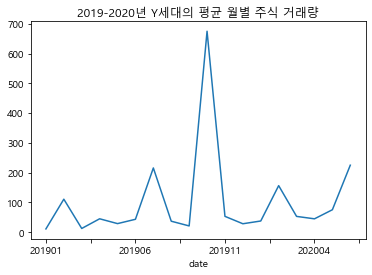

In [ ]:
a = Y[Y.year =="2019"].groupby("date")["cns_qty"].mean()
a2 = Y[Y.year =="2020"].groupby("date")["cns_qty"].mean()
a = pd.concat([a,a2],axis = 0)

ax = plt.subplots()
ax = a.plot()
ax.set_title("2019-2020년 Y세대의 평균 월평균 해외주식 거래량")
plt.show()

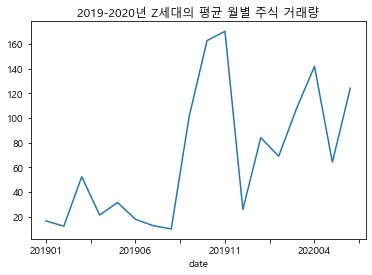

In [ ]:
b = Z[Z.year =="2019"].groupby("date")["cns_qty"].mean()
b2 = Z[Z.year =="2020"].groupby("date")["cns_qty"].mean()

bx = plt.subplots()
b = pd.concat([b,b2],axis = 0)
bx = b.plot()
bx.set_title("2019-2020년 Z세대의 월평균 해외주식 거래량")
plt.show()

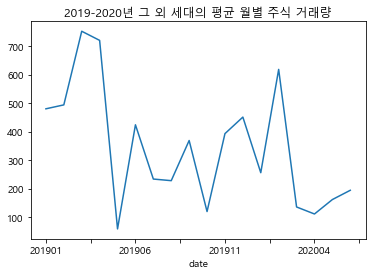

In [ ]:
c = Extra[Extra.year =="2019"].groupby("date")["cns_qty"].mean()
c2 = Extra[Extra.year =="2020"].groupby("date")["cns_qty"].mean()

cx = plt.subplots()
c = pd.concat([c,c2],axis = 0)
cx = c.plot()
cx.set_title("2019-2020년 그 외 세대의 월평균 해외주식 거래량")
plt.show()

Y, Z, 그리고 그 외 세대가 서로 굉장히 상이한 모습을 보여주는데, 코로나가 심해지기 시작한 2020년 2월 이후 Z세대의 주식 거래량이 증가한 것을 알 수 있다.
이는 즉 코로나-19로 인해 다른 활동들이 제한된 Z세대에게서 주식이 일종의 유행처럼 번지기 시작했다는 것을 알 수 있다. 
한편 Y세대 사이에서 해외 주식이 유행한 시점은 2019년 10-11월 즈음인 것을 알 수 있다. 

In [39]:
df2['orr_dt'] = df2['orr_dt'].astype(str)
df2['year']= df2['orr_dt'].str[0:4]
df2['month']= df2['orr_dt'].str[4:6]
df2['date'] = df2['orr_dt'].str[0:6]


In [34]:
before2 = df2[df2.year == '2019']
after2 = df2[df2.year == '2020']

before2.groupby("month")["cns_qty"].mean().to_frame()

,cns_qty
month,
01,353.087911
02,384.988186
03,398.978119
04,378.848180
05,437.592389
06,417.013989
07,434.880283
08,392.986220
09,387.572772


In [36]:
after2.groupby("month")["cns_qty"].mean().to_frame()

,cns_qty
month,
01,414.034244
02,421.546912
03,364.100059
04,416.379338
05,329.760661
06,365.696126


In [41]:
Y2 = df2[(df2['cus_age']>=30) & (df2['cus_age']<40)] #Y세대: 30-39세
Z2 = df2[(df2['cus_age']>=20) & (df2['cus_age']<30)] #Z세대: 20-20세
Y_Z2 = df2[(df2['cus_age']>=20) & (df2['cus_age']<40)] # Y&Z세대 통합
Extra2 = df2[(df2['cus_age']>=40)] #그 외 세대: 40세 이상
Ex1_2 = df2[(df2['cus_age']>=40) & (df2['cus_age']<50)] # 40대
Ex2_2 = df2[(df2['cus_age']>=50) & (df2['cus_age']<60)] # 50대
Ex3_2 = df2[(df2['cus_age']>=60)] # 60대 이상

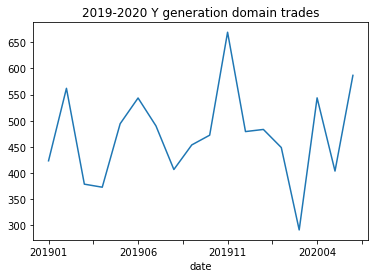

In [42]:
a = Y2[Y2.year =="2019"].groupby("date")["cns_qty"].mean()
a2 = Y2[Y2.year =="2020"].groupby("date")["cns_qty"].mean()
a = pd.concat([a,a2],axis = 0)

ax = plt.subplots()
ax = a.plot()
ax.set_title("2019-2020 Y generation domain trades")
plt.show()

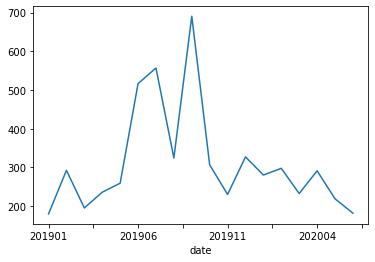

In [49]:
b = Z2[Z2.year =="2019"].groupby("date")["cns_qty"].mean()
b2 = Z2[Z2.year =="2020"].groupby("date")["cns_qty"].mean()
b = pd.concat([b,b2],axis = 0)

bx = plt.subplots()
bx = b.plot()
ax.set_title("2019-2020 Z generation domain trades")
plt.show()

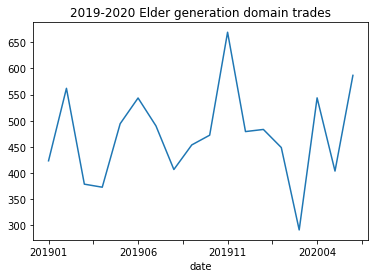

In [50]:
c = Y2[Y2.year =="2019"].groupby("date")["cns_qty"].mean()
c2 = Y2[Y2.year =="2020"].groupby("date")["cns_qty"].mean()
c = pd.concat([c,c2],axis = 0)

cx = plt.subplots()
cx = a.plot()
cx.set_title("2019-2020 Elder generation domain trades")
plt.show()

약간의 차이는 있었지만, 국내 주식의 경우 코로나 발생 이후 오히려 이전보다 줄어든 추세를 공통적으로 보이고 있다. 이는 즉 코로나-19로 국내 사업이 부진을 겪자 고객들이 해외로 눈을 돌린 것으로 해석할 수 있다. 